# Telco Customer Churn: Analysis and Prediction

# 1. Project Overview

**Objective:**  
Analyze Telco customer data to understand the factors driving customer churn and build a predictive model to identify at-risk customers. Provide actionable insights for retention strategies based on data patterns and model outcomes.

**Domain:**  
Telecommunications

**Tools Used:**  
pandas, numpy, matplotlib, seaborn, plotly, scikit-learn, statsmodels 
  

**Dataset Source:**    
[Kaggle – Telco Customer Churn Data](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)

**Dataset Size:**  
Records - 7,043 | Features - 21

**Modeling Objective:**  
- **Target Variable:** `Churn` (Yes/No)  
- **Problem Type:** Binary Classification  
- **Goal:** Predict customer churn to support proactive retention strategies


# 2. Data Understanding

## 2.1 Dataset Overview

The Telco Customer Churn dataset contains customer-level information from a telecommunications company. Each record represents one customer, including demographic attributes, account information, subscription details, billing data, and churn status.

| Variable             | Description                                               |
| -------------------- | --------------------------------------------------------- |
| **customerID**       | Unique customer identifier                                |
| **gender**           | Whether the customer is a male or a female                |
| **SeniorCitizen**    | Indicates senior citizen status (1 = Yes, 0 = No)         |
| **Partner**          | Whether the customer has a partner or not                 |
| **Dependents**       | Whether the customer has dependents or not                |
| **tenure**           | Number of months the customer has stayed with the company |
| **PhoneService**     | Whether the customer has a phone service                  |
| **MultipleLines**    | Whether the customer has multiple lines                   |
| **InternetService**  | Customer’s internet service provider                      |
| **OnlineSecurity**   | Whether the customer has online security                  |
| **OnlineBackup**     | Whether the customer has online backup                    |
| **DeviceProtection** | Whether the customer has device protection                |
| **TechSupport**      | Whether the customer has tech support                     |
| **StreamingTV**      | Whether the customer has streaming TV                     |
| **StreamingMovies**  | Whether the customer has streaming movies                 |
| **Contract**         | Contract term of the customer                             |
| **PaperlessBilling** | Whether the customer has paperless billing                |
| **PaymentMethod**    | Customer’s payment method                                 |
| **MonthlyCharges**   | Amount charged to the customer monthly                    |
| **TotalCharges**     | Total amount charged to the customer                      |
| **Churn**            | Whether the customer churned or not                       |


In [1]:
#Import Necessary Libraries
import pandas as pd # Pandas is used for data manipulation and analysis
import numpy as np # Numpy is used for numerical operations
import matplotlib.pyplot as plt # Matplotlib is used for creating static, animated, and interactive visualizations
import seaborn as sns # Seaborn is used for making statistical graphics
from scipy import stats # Scipy is used for scientific and technical computing

# Warnings is used to manage warning messages
import warnings
warnings.filterwarnings('ignore')

# Plotly is used for interactive visualizations
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Confirming the imports
print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2.2 Initial Observations

In [4]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

This dataset has no missing values which means we may not have to handle missing data.

In [5]:
# Check for duplicate rows

df.duplicated().sum()

0

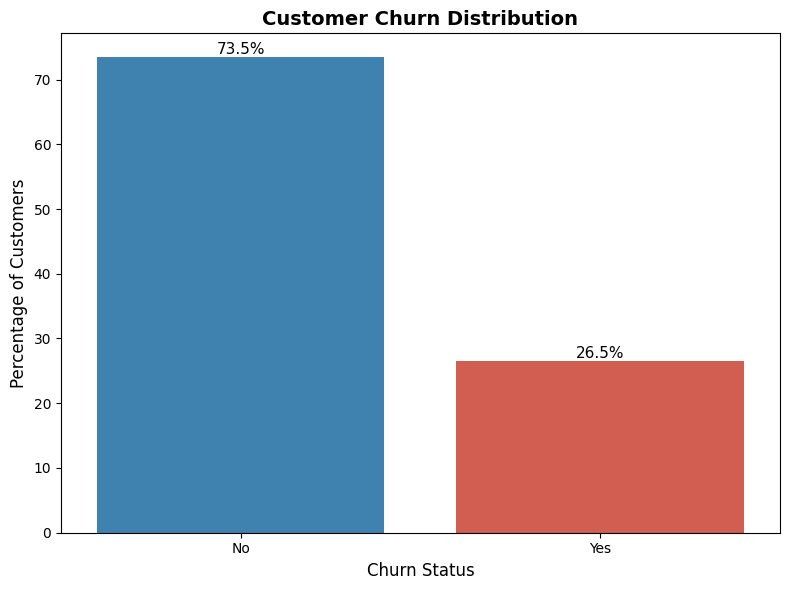

In [6]:
# Distribution of target variable (Chrun)

# Set visual style
plt.figure(figsize=(8,6))

# Create bar plot for churn distribution
ax = sns.barplot(
    x=df['Churn'].value_counts().index,
    y=df['Churn'].value_counts(normalize=True) * 100,
    palette=['#2E86C1', '#E74C3C']
)

# Add labels and title
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)

# Annotate percentage values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.show()

The churn distribution shows that approximately 26.5% of customers have churned, while 73.5% have remained active, indicating a moderate class imbalance typical in customer retention datasets.

# 3. Data Preparation

## 3.1 Data Cleaning

- **Handle Missing or Invalid Values:**  
  Although the dataset shows no explicit `NaN` values, the column `TotalCharges` is stored as an object type, which suggests that some entries may be blank or non-numeric. These must be converted to numeric form for analysis.

- **Duplicates:**  
  No duplicate rows are present.

- **Outliers:**  
  Outliers in monetary columns like `MonthlyCharges` and `TotalCharges` can skew models. We'll visualize and briefly assess these during EDA.

In [7]:
# Convert TotalCharges to numeric and handle invalid entries
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Identify missing values post-conversion
missing_total = df['TotalCharges'].isna().sum()
print(f"Missing TotalCharges values after conversion: {missing_total}")

# Handle missing TotalCharges by imputing with MonthlyCharges × tenure (approximation)
df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'], inplace=True)


Missing TotalCharges values after conversion: 11


## 3.2 Data Transformation

- **Type Conversions:**  
  - `TotalCharges` successfully converted from `object` → `float`.
  - `SeniorCitizen` will be treated as categorical for clarity.
  - Convert those boolean (True/False) columns into integers (1/0).

In [8]:
# Convert SeniorCitizen to categorical (0 = No, 1 = Yes)
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [9]:
df_original = df.copy()

- **Encoding Categorical Features:**

  For initial EDA and later modeling, categorical variables need to be encoded.
  - Keep binary columns (`Yes`/`No`) as 1/0.
  - Use One-Hot Encoding for multi-class categorical variables (e.g., `InternetService`, `Contract`, `PaymentMethod`).

In [10]:
for col in df_original.columns:
    print(f"Column: {col}")
    print(df_original[col].unique())
    print("-" * 100)


Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------------------------------------
Column: gender
['Female' 'Male']
----------------------------------------------------------------------------------------------------
Column: SeniorCitizen
['No' 'Yes']
----------------------------------------------------------------------------------------------------
Column: Partner
['Yes' 'No']
----------------------------------------------------------------------------------------------------
Column: Dependents
['No' 'Yes']
----------------------------------------------------------------------------------------------------
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
-----------------------

In [11]:
# Convert Yes/No columns to binary
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'SeniorCitizen'
]

for col in binary_cols:
    df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})

# One-hot encode multi-category columns
multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [12]:
df[df.select_dtypes('bool').columns] = df.select_dtypes('bool').astype('int64')

- **Scaling / Normalization (if needed for modeling):**

  We will normalize numeric features such as `tenure`, `MonthlyCharges`, and `TotalCharges` if needed, only before model fitting, not now, to keep EDA interpretable.

## 3.3 Feature Engineering

In [13]:
# Average Monthly Revenue per Customer
df['AvgChargePerMonth'] = df['TotalCharges'] / (df['tenure'] + 1) 

# +1 is added to avoid division by zero for new customers (tenure = 0).

In [14]:
# Grouping Customers by Service Duration
df['TenureGroup'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0–1 year', '1–2 years', '2–4 years', '4–6 years']
)

- `AvgChargePerMonth` shows spending pattern (helps identify high-value customers).
- `TenureGroup` shows customer loyalty stage (helps analyze churn by service duration).

The dataset is now fully cleaned, transformed, and feature-engineered, ensuring it is ready for detailed exploratory analysis and subsequent predictive modeling in the next phase.

# 4. Exploratory Data Analysis (EDA)

The goal of this section is to perform an in-depth exploratory analysis to uncover key patterns, relationships, and behavioral trends driving customer churn. Through interactive visualizations and guided analytical questions, we aim to translate raw data into actionable business insights understanding who churns, why they churn, and which features most influence their decision. This step bridges the gap between data understanding and predictive modeling, ensuring the model is built on well-interpreted and business-relevant foundations.

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AvgChargePerMonth,TenureGroup
0,7590-VHVEG,Female,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0,14.925000,0–1 year
1,5575-GNVDE,Male,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,1,0,0,0,1,53.985714,2–4 years
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1,36.050000,0–1 year
3,7795-CFOCW,Male,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,40.016304,2–4 years
4,9237-HQITU,Female,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0,50.550000,0–1 year


## 4.1 Overall churn overview

### Question 1. What is the overall churn rate and how does tenure relate to it?

Customers with shorter tenures often have higher churn likelihood. Let's analyze tenure distribution and its relationship with churn.

In [16]:
# Tenure distribution
fig = px.histogram(
    df,
    x='tenure', 
    color=df['Churn'].map({1:'Yes',0:'No'}),
    barmode='overlay',
    nbins=40,
    color_discrete_map={'Yes':'#E74C3C','No':'#2E86C1'},
    title='Customer Tenure Distribution by Churn Status'
)
fig.update_layout(
    xaxis_title='Tenure (Months)',
    yaxis_title='Number of Customers',
    hovermode='x unified',
    template='plotly_white',
    title_x=0.5
)
fig.update_traces(
    hovertemplate='<b>Tenure:</b> %{x}<br><b>Customers:</b> %{y}<extra></extra>'
)
fig.show(renderer='iframe')

A strong concentration of churned customers appears in the 0–12 month range, indicating that early-stage disengagement is a key business problem. Longer-tenure customers show markedly lower churn, suggesting customer loyalty grows over time.

## 4.2 Customer demographics and segments

### Question 2. Does churn behavior vary across different gender groups?


In [17]:
fig = px.histogram(
    df_original,
    x='gender',
    color=df['Churn'].map({1:'Yes',0:'No'}),
    barmode='group',
    color_discrete_map={'Yes':'#E74C3C','No':'#2E86C1'},
    title='Churn by Gender Group'
)
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Number of Customers',
    hovermode='x unified',
    template='plotly_white',
    title_x=0.5
)
fig.update_traces(
    hovertemplate='<b>Gender:</b> %{x}<br><b>Customers:</b> %{y}<extra></extra>'
)
fig.show(renderer='iframe')

 Not really! Churn behavior is similar across different gender groups, with no significant differences observed.

### Question 3. Which customer segments (demographic and tenure-based) are most vulnerable to churn?

We combine demographic and behavioral features to find risk zones.

In [18]:
 df['TenureGroup'] = df['TenureGroup'].cat.add_categories('Unknown').fillna('Unknown')

In [19]:
df['TenureGroup'].value_counts()

TenureGroup
4–6 years    2239
0–1 year     2175
2–4 years    1594
1–2 years    1024
Unknown        11
Name: count, dtype: int64

In [20]:
# Prepare a clean dataframe for treemap
treemap_df = df.dropna(subset=['TenureGroup', 'SeniorCitizen', 'Churn']).copy()
treemap_df['SeniorStatus'] = treemap_df['SeniorCitizen'].map({1:'Senior', 0:'Non-Senior'})
treemap_df['ChurnStatus'] = treemap_df['Churn'].map({1:'Churned', 0:'Active'})


fig = px.treemap(
    treemap_df,
    path=['TenureGroup', 'SeniorStatus', 'ChurnStatus'],
    values=None,  # counts by default
    color='Churn', 
    color_continuous_scale=['#2E86C1','#E74C3C'],
)


fig.update_traces(
    hovertemplate='<b>Tenure Group:</b> %{label}<br>'+
                  '<b>Senior Status:</b> %{parent}<br>'+
                  '<b>Churn Status:</b> %{id}<br>'+
                  '<b>Count:</b> %{value}<extra></extra>'
)

fig.update_layout(
    title='Churn by Tenure Group and Senior Status',
    title_x=0.5,
    template='plotly_white',
    coloraxis_showscale= True,  
    hovermode='x unified'
)

fig.show(renderer='iframe')


Short-tenure and senior-citizen customers are overrepresented among churners. This indicates that improving the early customer experience and implementing targeted senior-customer engagement programs could significantly reduce churn.

## 4.3 Service and product-related factors

### Question 4. Does Internet Service type impact churn?

Internet service is a core offering; differences in technology and service quality can drive churn.

In [21]:
fig = px.histogram(
    df_original,
    x='InternetService', 
    color=df['Churn'].map({1:'Yes',0:'No'}),
    barmode='group',
    color_discrete_map={'Yes':'#E74C3C','No':'#2E86C1'},
    title='Churn by Internet Service Type'
)
fig.update_layout(
    xaxis_title='Internet Service Type',
    yaxis_title='Number of Customers',
    hovermode='x unified',
    template='plotly_white',
    title_x=0.5
)
fig.update_traces(
    hovertemplate='<b>Service Type:</b> %{x}<br><b>Customers:</b> %{y}<extra></extra>'
)
fig.show(renderer='iframe')


Customers using Fiber Optic services show the highest churn rate. This may reflect higher expectations or pricing dissatisfaction compared to DSL users, highlighting the need for service quality optimization and pricing strategies for this segment.

### Question 5. Does the monthly billing amount influence churn?

In [22]:
# Monthly charges distribution
fig = px.box(
    df,
    x=df['Churn'].map({1:'Yes',0:'No'}),
    y='MonthlyCharges',
    color=df['Churn'].map({1:'Yes',0:'No'}),
    color_discrete_map={'Yes':'#E74C3C','No':'#2E86C1'},
    title='Monthly Charges Distribution by Churn Status'
)
fig.update_layout(
    xaxis_title='Churn Status',
    yaxis_title='Monthly Charges ($)',
    hovermode='x unified',
    template='plotly_white',
    title_x=0.5
)
fig.update_traces(
    hovertemplate='<b>Churn:</b> %{x}<br><b>Monthly Charges:</b> $%{y:,.2f}<extra></extra>'
)
fig.show(renderer='iframe')

Churned customers tend to have higher average monthly charges, indicating that pricing sensitivity may play a major role in churn. However, high-value plans could also correspond to fiber optic or multiple service bundles, which requires deeper service-level analysis.

## 4.4 Contract and payment-related factors

### Question 6. How does churn vary by contract type?

Long-term contracts often reduce churn due to commitment and discount incentives.

In [23]:
fig = px.histogram(
    df_original,
    x='Contract',
    color=df['Churn'].map({1:'Yes',0:'No'}),
    barmode='group',
    color_discrete_map={'Yes':'#E74C3C','No':'#2E86C1'},
    title='Churn by Contract Type'
)
fig.update_layout(
    xaxis_title='Contract Type',
    yaxis_title='Number of Customers',
    hovermode='x unified',
    template='plotly_white',
    title_x=0.5
)
fig.update_traces(
    hovertemplate='<b>Contract:</b> %{x}<br><b>Customers:</b> %{y}<extra></extra>'
)
fig.show(renderer='iframe')

Month-to-month customers exhibit the highest churn rates. One- and two-year contracts demonstrate much stronger retention, emphasizing the stabilizing effect of long-term commitments. This aligns with business strategies that incentivize longer-term plans to reduce churn.

### 4.7. Which payment methods are more prone to churn?

Payment convenience and automation can influence retention behavior.

In [24]:
fig = px.histogram(
    df_original, 
    x='PaymentMethod',
    color=df['Churn'].map({1:'Yes',0:'No'}),
    barmode='group',
    color_discrete_map={'Yes':'#E74C3C','No':'#2E86C1'},
    title='Churn by Payment Method'
)
fig.update_layout(
    xaxis_title='Payment Method',
    yaxis_title='Number of Customers',
    hovermode='x unified',
    template='plotly_white',
    title_x=0.5
)
fig.update_traces(
    hovertemplate='<b>Payment Method:</b> %{x}<br><b>Customers:</b> %{y}<extra></extra>'
)
fig.show(renderer='iframe')


Customers paying via electronic check churn at significantly higher rates, likely due to manual effort and perceived inconvenience. In contrast, automatic payments such as bank transfer or credit card correlate strongly with customer retention. Similarly, customers using mailed check payments show retention patterns comparable to automatic payments, indicating that reliable and consistent payment methods support lower churn.

# 5. Statistical & Diagnostic Analysis

This section performs statistical validation and diagnostic checks to ensure data quality and model readiness. We assess variable correlations, statistical significance, multicollinearity, and distribution patterns of key numeric features.


## 5.1. Correlation Analysis (Numerical Relationships)

In [25]:
# Compute correlation matrix
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgChargePerMonth', 'Churn']].corr()

# Create Plotly heatmap
fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='Blues',
    title='Correlation Matrix (Numerical Variables)',
    aspect='auto'
)


fig.update_traces(
    hovertemplate='<b>Variable 1:</b> %{x}<br>'
                  '<b>Variable 2:</b> %{y}<br>'
                  '<b>Correlation:</b> %{z:.2f}<extra></extra>',
    textfont=dict(size=12)
)


fig.update_layout(
    template='plotly_white',
    title_x=0.5,
    xaxis=dict(showgrid=False, side='bottom', tickfont=dict(size=12)),
    yaxis=dict(showgrid=False, autorange='reversed', tickfont=dict(size=12)),
    coloraxis_colorbar=dict(title='Correlation', ticksuffix='')
)

fig.show(renderer='iframe')


- `Tenure` and `Churn` are negatively correlated → longer-tenure customers are less likely to churn.
- `MonthlyCharges` shows moderate correlation with `TotalCharges`, but a weak one with `tenure`, suggesting different billing tiers.
- `TotalCharges` is highly correlated with `tenure` (as expected, longer tenure leads to higher total charges).

## 5.2 Distribution of Important Numeric Features

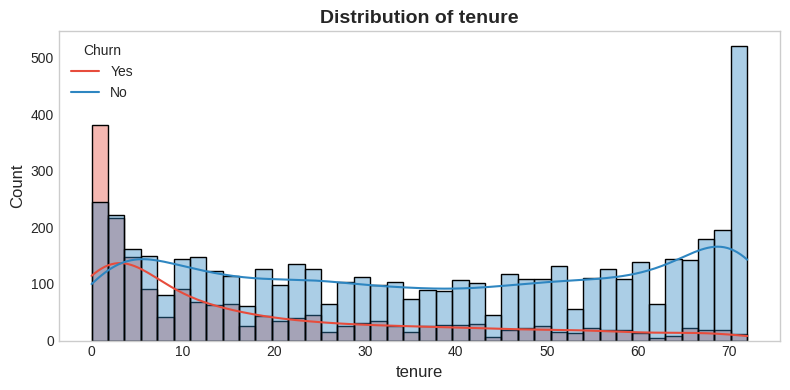

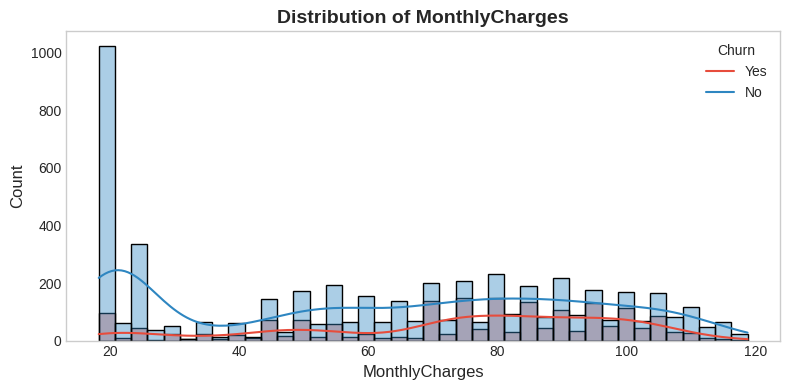

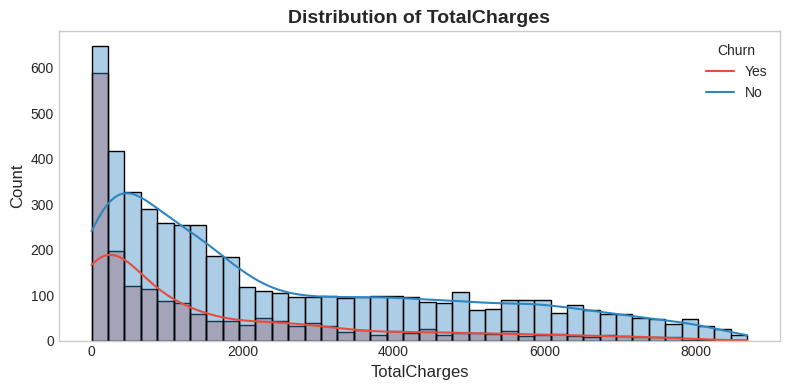

In [26]:
# Distribution plots for key numeric features
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.style.use('seaborn-whitegrid')

for col in num_features:
    plt.figure(figsize=(8,4))
    sns.histplot(
        data=df, 
        x=col, 
        hue='Churn', 
        kde=True, 
        bins=40,
        palette={1:'#E74C3C',0:'#2E86C1'},
        alpha=0.4
    )
    
    plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Churn', labels=['Yes', 'No'])
    plt.grid(False) 
    plt.tight_layout()
    plt.show()


#### **A. Tenure**

The tenure distribution is bimodal, with a high concentration of customers at the lowest end (0 -3 Months) and another peak near the maximum value (~ 72 months).

**Why this happens:**

* The first peak (new customers) reflects recent acquisitions, possibly from marketing campaigns or promotional offers.
* The second peak (long-tenure customers) represents loyal, retained customers who have been consistently satisfied with the service.
* The blue line (Non-Churn) are consistently higher than the red line in mid-range, suggesting that once a customer stays past the initial few months, they are much less likely to churn.
  
#### **B. MonthlyCharges**

Monthly charges follow a right-skewed distribution, most customers are paying moderate fees, while a smaller subset pays  very high monthly rates.

**Why this happens:**

* Low Charges: This segment represents the largest portion of the customer base and the most stable (lowest proportional churn risk), likely due to basic/fixed plans.
* Mid-to-High Charges: This segment shows a higher risk of churn. Retention efforts should target these customers, focusing on improving the perceived value-for-money of their higher-cost packages.

#### **C. TotalCharges**

The `TotalCharges` variable is heavily right-skewed, spanning from near zero up to several thousand dollars.

**Why this happens:**

* TotalCharges is the cumulative sum of monthly charges over tenure, so customers with short relationships contribute to low totals.
* Long-tenured, high-paying customers accumulate high totals, forming the long tail on the right.


## 5.3 Statistical Significance Tests (Categorical Variables vs Churn)

Chi-square checks association between categorical variables. Loops through features, calculates p-values, and shows which features are important for churn.

In [27]:
from scipy.stats import chi2_contingency

# List of categorical features for testing (excluding customerID and numeric features)
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PaperlessBilling', 'InternetService_Fiber optic', 'InternetService_No',
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check', 'TenureGroup'
]

# Store results
chi2_results = []

for col in categorical_features:
    contingency = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})

chi2_df = pd.DataFrame(chi2_results).sort_values(by='p-value')

#### **Hypotheses:**

* Null hypothesis (H₀): The two variables are independent (no relationship).

* Alternative hypothesis (H₁): The two variables are dependent (there is a relationship).

**p-value interpretation:**

* p < 0.05 → Reject H₀ → The feature is related to churn

* p ≥ 0.05 → Cannot reject H₀ → The feature is likely not related


#### <p style="text-align: center;"> Chi-Square Test Results Summary </p>


| Feature                               | Chi2   | p-value   | Significance    |Interpretation                                                                           |
| ------------------------------------- | ------ | --------- | --------------- | --------------------------------------------------------------------------------------- |
| TenureGroup                           | 868.86 | 9.29e-187 | Significant     | Early-tenure customers are highly prone to churn, critical for retention programs.      |
| InternetService_Fiber optic           | 666.81 | 4.94e-147 | Significant     | Fiber users churn more; likely due to higher expectations or costs.                     |
| Contract_Two year                     | 641.83 | 1.34e-141 | Significant     | Two-year contract strongly reduces churn; long-term commitment is stabilizing.          |
| PaymentMethod_Electronic check        | 640.56 | 2.53e-141 | Significant     | Manual payment users churn more; automatic payments encourage retention.                |
| InternetService_No                    | 364.52 | 2.92e-81  | Significant     | Customers without internet service have lower churn; reflects lower service complexity. |
| PaperlessBilling                      | 258.28 | 4.07e-58  | Significant     | Paperless billing correlates with churn; may indicate demographic/behavioral trends.    |
| Contract_One year                     | 221.71 | 3.83e-50  | Significant     | One-year contracts also reduce churn, but less than two-year contracts.                 |
| OnlineSecurity                        | 205.63 | 1.23e-46  | Significant     | Lack of online security increases churn service value matters.                          |
| TechSupport                           | 190.17 | 2.92e-43  | Significant     | Customers without tech support churn more; indicates service support importance.        |
| Dependents                            | 189.13 | 4.92e-43  | Significant     | Customers with dependents tend to stay longer; family-oriented retention effect.        |
| SeniorCitizen                         | 159.43 | 1.51e-36  | Significant     | Seniors are more likely to churn; targeted engagement may help.                         |
| Partner                               | 158.73 | 2.14e-36  | Significant     | Customers with partners have slightly lower churn; household support reduces churn.     |
| PaymentMethod_Credit card (automatic) | 126.30 | 2.65e-29  | Significant     | Automatic payments strongly retain customers.                                           |
| PaymentMethod_Mailed check            | 58.71  | 1.83e-14  | Significant     | Mailed check users show slightly higher churn.                                          |
| OnlineBackup                          | 47.26  | 6.21e-12  | Significant     | Lack of backup service increases churn slightly.                                        |
| DeviceProtection                      | 30.51  | 3.32e-08  | Significant     | Customers without device protection are slightly more likely to churn.                  |
| StreamingTV                           | 27.86  | 1.30e-07  | Significant     | TV streaming service affects churn modestly.                                            |
| StreamingMovies                       | 26.25  | 3.00e-07  | Significant     | Movie streaming influences churn slightly.                                              |
| MultipleLines                         | 11.14  | 8.43e-04  | Significant     | Multiple lines have minor effect.                                                       |
| PhoneService                          | 0.92   | 0.338     | Not Significant | Basic phone service does not influence churn.                                           |
| gender                                | 0.48   | 0.487     | Not Significant | Gender has no meaningful impact on churn.                                               |


 
#### **Key Takeaways**

1. **Highly Significant Drivers of Churn**

   * `TenureGroup`, `Contract` types, `PaymentMethod_Electronic check`, `InternetService_Fiber optic`.
   * These features are priority predictors for modeling churn.

2. **Moderate Influence Features**

   * `OnlineSecurity`, `TechSupport`, `Dependents`, `PaperlessBilling`, `DeviceProtection`.
   * These may improve model accuracy and provide actionable service insights.

3. **Insignificant Features**

   * `PhoneService` and `gender` can be excluded from predictive models without losing explanatory power.


**Business Interpretation:**

* Retention programs should target early-tenure customers, fiber optic users, and manual payment customers.
* Service enhancements like online security, tech support, and device protection can reduce churn.
* Gender and basic phone service are not actionable for churn interventions.

## 5.4 Multicollinearity Check (VIF Analysis)

VIF = Variance Inflation Factor, measures how strongly each numeric predictor is linearly related to other predictors.

| VIF Value | Interpretation                                |
| --------- | --------------------------------------------- |
| 1         | No correlation with others                    |
| 1–5       | Moderate correlation (usually acceptable)     |
| > 5       | High correlation, possible multicollinearity |
| > 10      | Serious multicollinearity problem             |


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoded_df = df.copy()
for col in encoded_df.select_dtypes(include='object').columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

# Compute VIF for numeric predictors
X = encoded_df[['tenure', 'MonthlyCharges', 'TotalCharges']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data 

,Feature,VIF
0,tenure,6.332328
1,MonthlyCharges,3.355660
2,TotalCharges,8.075070




#### <p style="text-align: center;"> **Variance Inflation Factor (VIF) Results**</p>

| Feature            | VIF  | Interpretation                                                               |
| ------------------ | ---- | ---------------------------------------------------------------------------- |
| **tenure**         | 6.33 | High multicollinearity, tenure is strongly correlated with other predictors |
| **MonthlyCharges** | 3.36 | Moderate correlation, acceptable                                            |
| **TotalCharges**   | 8.08 | High multicollinearity, strongly related to tenure and MonthlyCharges       |


These VIF values indicate that multicollinearity exists among our numeric predictors, particularly between:

* **tenure** and
* **TotalCharges**

Since, <p style="text-align: center;"> `TotalCharges` = `MonthlyCharges` x `tenure` </p>
They naturally move together.This means if we use these variables in a regression model (like linear or logistic regression), their coefficients may become unstable or statistically unreliable, because the model can’t separate their individual effects on churn.

**Why it matters**

* Only important for regression-based models (Linear, Logistic, etc.)
  because these models rely on coefficient estimates.
* For tree-based models (Decision Tree, Random Forest, XGBoost, etc.),
  multicollinearity doesn’t harm prediction accuracy, so we can safely keep all variables.

Multicollinearity is present among numeric predictors, but can be mitigated by careful selection of variables for regression, ensuring stable and interpretable coefficients.

# 6. Prediction Model

**Objective:**
Predict customer churn (`Churn`) using key demographic, service, and billing features. This enables proactive retention strategies and business decision-making.

**Problem Type:**

* **Classification** (Binary: `Yes` / `No` for churn)

## 6.1 Feature Selection

| Model Type                                               | Numeric Features                           | Categorical Features          | Notes                                                                         |
| -------------------------------------------------------- | ------------------------------------------ | ----------------------------- | ----------------------------------------------------------------------------- |
| **Regression**                     | `tenure`, `MonthlyCharges`                 | Encoded categorical variables | Drop `TotalCharges`, `AvgChargePerMonth` to avoid multicollinearity           |
| **Tree-Based Models** | `tenure`, `MonthlyCharges`, `TotalCharges` | Encoded categorical variables | `AvgChargePerMonth` optional; tree-based models handle multicollinearity well |



**Target Variable:**

* `Churn` (encoded as 1 = Yes, 0 = No)

**Candidate Features:**

* Statistically validated and actionable:

  * Numeric: `tenure`, `MonthlyCharges`, `TotalCharges`
  * Categorical: `Contract`, `PaymentMethod`, `InternetService`, `OnlineSecurity`, `TechSupport`, `PaperlessBilling`, `DeviceProtection`, `Dependents`, `SeniorCitizen`
* Exclude: `gender`, `PhoneService`, `customerID` (non-informative)


## **6.2 Candidate Models**

To ensure a systematic and unbiased model development process, five candidate algorithms were selected, covering diverse methodological families linear, distance-based, and ensemble tree-based methods. This diversity helps assess which learning paradigm best captures customer churn behavior while maintaining a balance between interpretability and predictive strength.

**Candidate Models Overview**

* **Logistic Regression**: Linear, interpretable baseline suitable for initial benchmarking.
* **K-Nearest Neighbors (KNN)**: Simple distance-based method that captures local patterns.
* **Random Forest**: Ensemble tree model known for robustness and handling multicollinearity.
* **XGBoost**: Gradient boosting method capable of modeling complex feature interactions.
* **LightGBM**: Efficient boosting variant optimized for large-scale tabular data.

**Evaluation Approach**

The model evaluation will follow a two-stage process designed to reflect real-world machine learning practice:

1. **Baseline Stage:**
   Logistic Regression and KNN will be trained using default hyperparameters.
   This establishes a reference for model interpretability and fundamental predictive capacity without introducing complexity from parameter tuning.

2. **Advanced Model Stage:**
   For ensemble-based models (Random Forest, XGBoost, LightGBM), hyperparameter tuning will be performed on key parameters.
   The objective here is to reach fair operational settings that reflect each model’s potential.

3. **Model Selection:**
   After comparing all models using consistent evaluation metrics (Accuracy, Precision, Recall, F1-score, ROC-AUC and PR-AUC), the top-performing algorithm will be chosen.


## 6.3 Model Training and Evaluation

Train multiple candidate models for customer churn prediction, evaluate their performance using classification metrics, and visualize model diagnostics for clear interpretation.

In [29]:
from sklearn.model_selection import train_test_split

# Regression features
reg_features = ['tenure', 'MonthlyCharges'] + [col for col in df.columns if col.startswith(('Contract','PaymentMethod','InternetService','OnlineSecurity','TechSupport','PaperlessBilling','DeviceProtection','Dependents','SeniorCitizen'))]

# Tree-based features
tree_features = ['tenure', 'MonthlyCharges', 'TotalCharges'] + [col for col in df.columns if col.startswith(('Contract','PaymentMethod','InternetService','OnlineSecurity','TechSupport','PaperlessBilling','DeviceProtection','Dependents','SeniorCitizen'))]

# Regression dataset
X_reg = df[reg_features]
y = df['Churn']

# Tree-based dataset
X_tree = df[tree_features]

# Split both datasets (stratify to maintain churn distribution)
X_reg_train, X_reg_test, y_train, y_test = train_test_split(X_reg, y, test_size=0.2, random_state=42, stratify=y)
X_tree_train, X_tree_test, _, _ = train_test_split(X_tree, y, test_size=0.2, random_state=42, stratify=y)

print(f"Regression features train/test size: {X_reg_train.shape}/{X_reg_test.shape}")
print(f"Tree-based features train/test size: {X_tree_train.shape}/{X_tree_test.shape}")


Regression features train/test size: (5634, 15)/(1409, 15)
Tree-based features train/test size: (5634, 16)/(1409, 16)


In [30]:
# Evaluation Function
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    precision_recall_curve,
    average_precision_score
)

def evaluate_model(
    y_true, y_pred, y_prob, 
    model_name="Model",
    show_cm=True,
    show_roc=True,
    show_pr=True
):
    """
    Evaluate a binary classification model with optional visualizations.

    Parameters
    ----------
    y_true : array-like
        True binary labels (0/1).
    y_pred : array-like
        Predicted class labels (0/1).
    y_prob : array-like
        Predicted probabilities for the positive class.
    model_name : str
        Name of the model (for plot titles).
    show_cm : bool
        If True, display the confusion matrix.
    show_roc : bool
        If True, display the ROC curve.
    show_pr : bool
        If True, display the Precision-Recall curve.
    """

    # === Text Metrics ===
    print(f"\n{'='*60}")
    print(f"{model_name} - Evaluation Summary")
    print(f"{'='*60}\n")
    print("Classification Report:\n")
    print(classification_report(y_true, y_pred))
    print(f"ROC-AUC: {roc_auc_score(y_true, y_prob):.3f}")
    print(f"PR-AUC : {average_precision_score(y_true, y_prob):.3f}")

    # === Confusion Matrix ===
    if show_cm:
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f"{model_name} - Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    # === ROC Curve ===
    if show_roc:
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_true, y_prob):.3f}")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate (1 - Specificity)")
        plt.ylabel("True Positive Rate (Recall)")
        plt.title(f"ROC Curve - {model_name}")
        plt.legend()
        plt.grid(False)
        plt.show()

    # === Precision–Recall Curve ===
    if show_pr:
        precision, recall, _ = precision_recall_curve(y_true, y_prob)
        avg_precision = average_precision_score(y_true, y_prob)
        plt.figure(figsize=(6, 5))
        plt.plot(recall, precision, color='purple', label=f'AP = {avg_precision:.3f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision–Recall Curve - {model_name}')
        plt.legend()
        plt.grid(False)
        plt.show()

## <p style="text-align: center;"> 6.3.1 Logistic Regression</p>

In [31]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

# Fit model
logreg.fit(X_reg_train, y_train)

# Predictions
y_pred_lr = logreg.predict(X_reg_test)
y_prob_lr = logreg.predict_proba(X_reg_test)[:,1]

We set `class_weight='balanced'` because our dataset is moderately imbalanced (churners = 26.5%). This ensures the model pays proportionally more attention to churners during training, improving the ability to identify high-risk customers.


Logistic Regression - Evaluation Summary

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC-AUC: 0.836
PR-AUC : 0.629


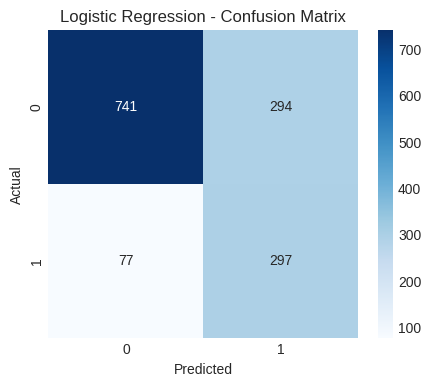

In [32]:
evaluate_model(y_test, y_pred_lr, y_prob_lr, model_name="Logistic Regression", show_cm = True, show_roc = False, show_pr = False)

The Logistic Regression baseline achieved an ROC-AUC of 0.836 and PR-AUC of 0.629, demonstrating meaningful predictive power despite the dataset’s imbalance. The model prioritized recall (0.79) over precision (0.50), effectively identifying most churners at the cost of some false positives, a trade-off often acceptable in retention scenarios.
Coefficient analysis will provide interpretability into key churn drivers, and this baseline will serve as the benchmark for comparing more complex ensemble models.

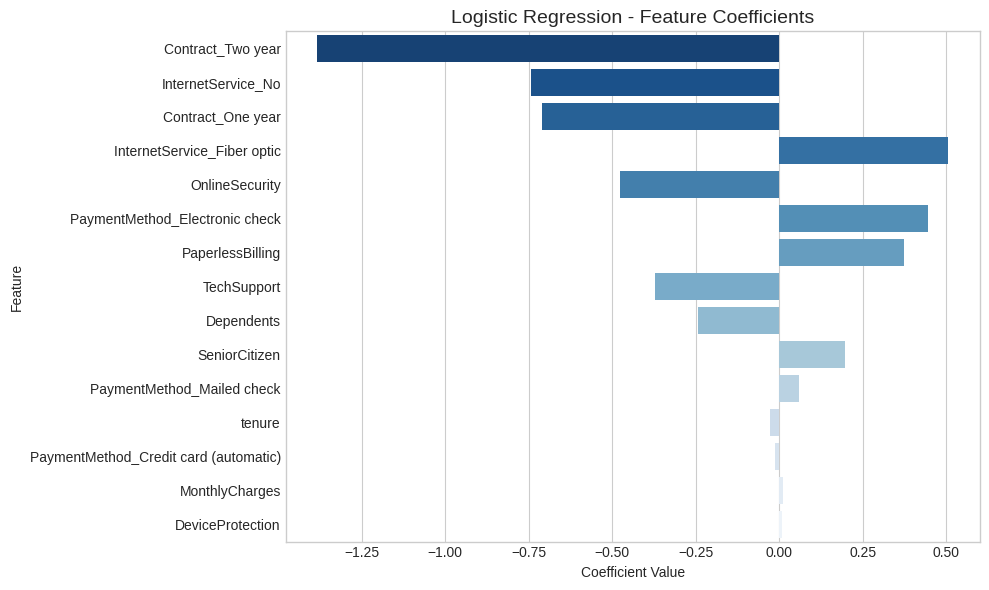

In [33]:
# Extract coefficients and feature names
coef_df = pd.DataFrame({
    'Feature': X_reg.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='Blues_r')
plt.title("Logistic Regression - Feature Coefficients", fontsize=14)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**Top Features Influencing Churn:**

| Feature                     | Coefficient | Effect on Churn                         |
|-------------------------------|------------|----------------------------------------|
| Contract_Two year             | -1.38      | Strongly reduces churn                  |
| InternetService_No            | -0.74      | Reduces churn (no internet customers less likely to leave) |
| Contract_One year             | -0.71      | Reduces churn                            |
| InternetService_Fiber optic   | +0.51      | Increases churn risk                     |
| PaymentMethod_Electronic check| +0.45      | Increases churn risk                     |
| OnlineSecurity                | -0.48      | Reduces churn                             |

**Insights:**
- **Contract Length Matters:** Longer-term contracts significantly retain customers.  
- **Service Type Impacts Risk:** Fiber optic users are more likely to churn; customers without internet are least likely.  
- **Payment Method Matters:** Customers paying via electronic check are more likely to churn, indicating a possible friction or risk factor.  
- **Security Services Retain Customers:** Online security services contribute to loyalty.  

> Retention strategies: target high-risk payment users, promote longer contracts, and enhance value for fiber internet users.



## <p style="text-align: center;">6.3.2 K-Nearest Neighbors Classifier</p>

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Scale numeric features for KNN
scaler = StandardScaler()
X_reg_scaled = X_reg.copy()
numeric_features = ['tenure', 'MonthlyCharges']
X_reg_scaled[numeric_features] = scaler.fit_transform(X_reg_scaled[numeric_features])

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_reg_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Fit model
knn.fit(X_train_knn, y_train_knn)

# Predictions
y_pred_knn = knn.predict(X_test_knn)
y_prob_knn = knn.predict_proba(X_test_knn)[:,1]

The K-Nearest Neighbors (KNN) model is included purely as a simple, distance-based baseline reference model. We intentionally avoided hyperparameter tuning for $k$ to maintain its status as a simple benchmark. The goal of a baseline is to establish a minimum performance floor that the more complex, resource-intensive advanced candidate models (XGBoost, LightGBM, Random Forest) must convincingly surpass. Investing valuable project time and computational resources in optimizing a baseline model would defeat its purpose and detract from the tuning efforts required for the high-performance ensemble models.


KNN Neighbors Classifier - Evaluation Summary

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.56      0.49      0.52       374

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.76      1409

ROC-AUC: 0.766
PR-AUC : 0.519


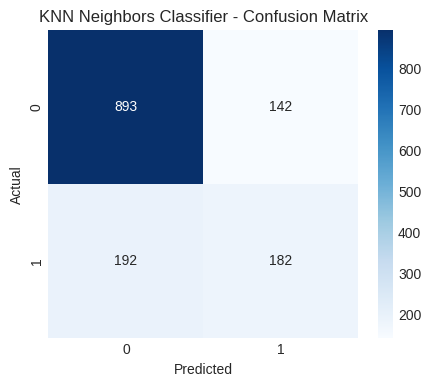

In [35]:
evaluate_model(y_test_knn, y_pred_knn, y_prob_knn, model_name="KNN Neighbors Classifier", show_cm = True, show_roc = False, show_pr = False)

The K-Nearest Neighbors (KNN) classifier achieved an ROC-AUC of 0.766 and PR-AUC of 0.519, underperforming relative to the Logistic Regression baseline. While overall accuracy was comparable (0.76), the model’s recall for churners dropped to 0.49, indicating limited ability to detect positive cases.
This weakness likely stems from high feature dimensionality and data imbalance, both of which reduce the discriminative power of distance-based methods. Although further hyperparameter tuning or dimensionality reduction may yield marginal gains, KNN appears less suitable for this churn dataset due to its reliance on local proximity rather than global behavioral patterns.

> **Baseline Models (Logistic Regression, KNN):**
These models were trained with minimal configuration to serve as interpretability-driven baselines. No hyperparameter tuning was performed at this stage to ensure an unbiased assessment of their inherent predictive capacity. The objective was to establish a reference benchmark against which more complex ensemble models can be compared.

> **Advanced Models (Random Forest, XGBoost, LightGBM):**
These algorithms will undergo controlled hyperparameter tuning to explore their full performance potential.

## <p style="text-align: center;">6.3.3 Random Forest </p>

In [36]:
# Import library
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

# Fit model
rf.fit(X_tree_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_tree_test)
y_prob_rf = rf.predict_proba(X_tree_test)[:,1]


Random Forest - Evaluation Summary

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.49      0.54       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

ROC-AUC: 0.815
PR-AUC : 0.607


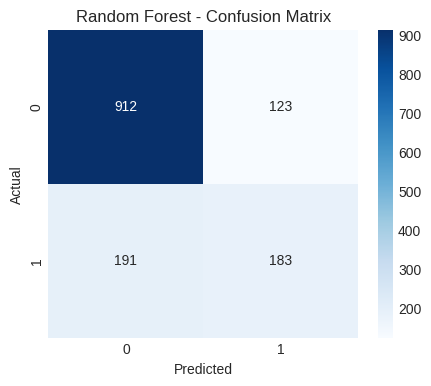

In [37]:
evaluate_model(y_test, y_pred_rf, y_prob_rf, model_name="Random Forest", show_cm = True, show_roc = False, show_pr = False)

Use this to understand which behavioral features drive churn even before optimization:

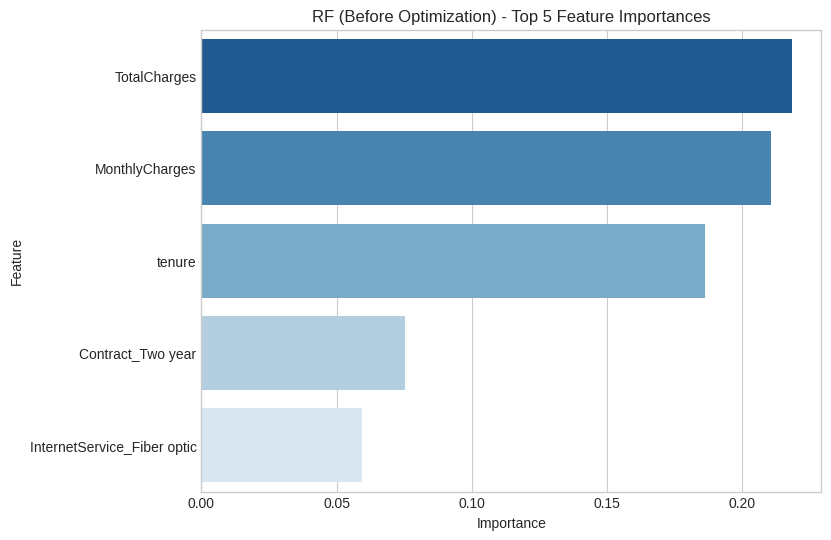

In [38]:
# Feature importance - early insights
importances = rf.feature_importances_
feat_names = X_tree_train.columns
feat_df = pd.DataFrame({'Feature':feat_names, 'Importance':importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(), palette='Blues_r')
plt.title("RF (Before Optimization) - Top 5 Feature Importances")
plt.show()


## <p style="text-align: center;"> 6.3.4 XGBoost Classifier </p>

In [39]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic',
                    n_estimators=200, 
                    learning_rate=0.1,
                    random_state=42, 
                    use_label_encoder=False,
                    eval_metric='logloss')

xgb.fit(X_tree_train, y_train)

y_pred_xgb = xgb.predict(X_tree_test)
y_prob_xgb = xgb.predict_proba(X_tree_test)[:,1]


XGBoost Classifier - Evaluation Summary

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

ROC-AUC: 0.829
PR-AUC : 0.632


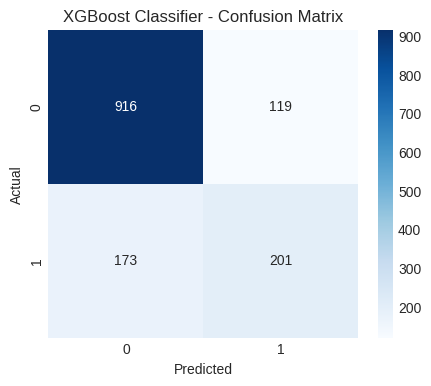

In [40]:
evaluate_model(y_test, y_pred_xgb, y_prob_xgb, model_name="XGBoost Classifier", show_cm = True, show_roc = False, show_pr = False)

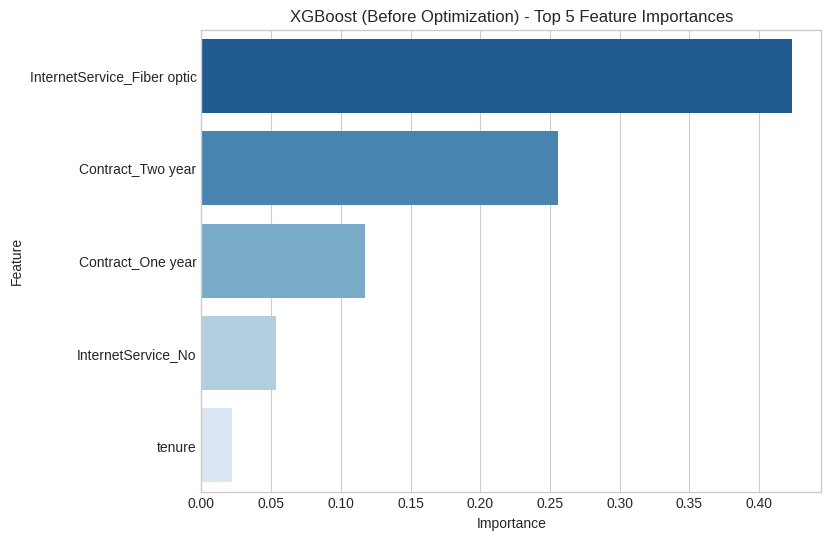

In [41]:
# Feature importance
xgb_importances = xgb.feature_importances_
feat_df_xgb = pd.DataFrame({'Feature':feat_names, 'Importance':xgb_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_df_xgb.head(5), palette='Blues_r')
plt.title("XGBoost (Before Optimization) - Top 5 Feature Importances")
plt.show()


## <p style="text-align: center;"> 6.3.5 LightGBM Classifier </p>

In [42]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(objective='binary',
                          n_estimators=200,
                          learning_rate=0.1,
                          class_weight='balanced',
                          random_state=42, 
                          verbosity=-1)

lgbm.fit(X_tree_train, y_train)

y_pred_lgb = lgbm.predict(X_tree_test)
y_prob_lgb = lgbm.predict_proba(X_tree_test)[:,1]


LightGBM Classifier - Evaluation Summary

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1035
           1       0.53      0.70      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.75      0.76      1409

ROC-AUC: 0.825
PR-AUC : 0.618


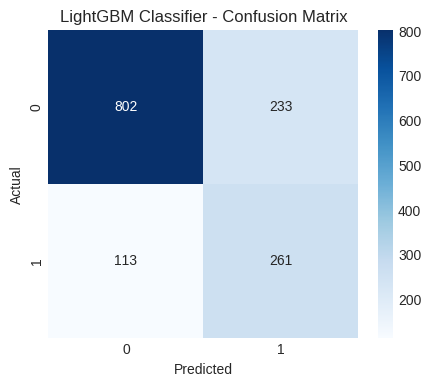

In [43]:
evaluate_model(y_test, y_pred_lgb, y_prob_lgb, model_name="LightGBM Classifier", show_cm = True, show_roc = False, show_pr = False)

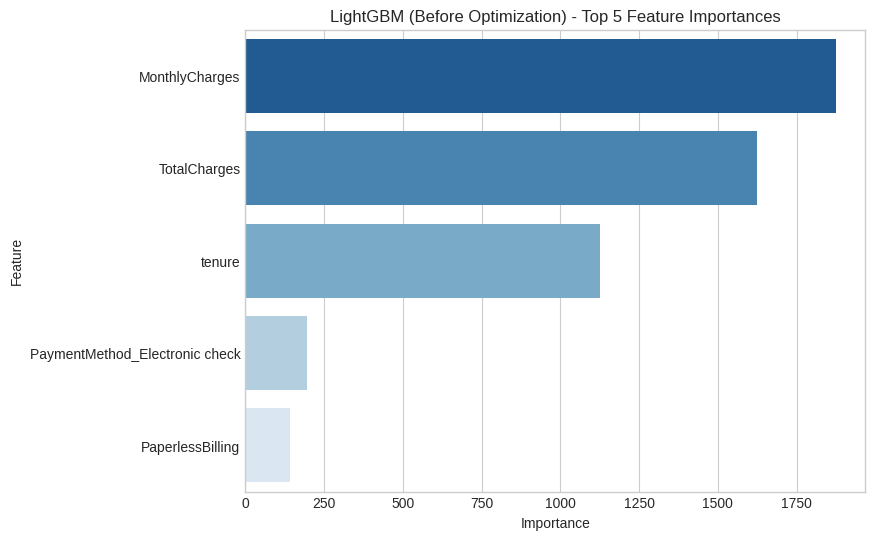

In [44]:
# Feature importance
lgb_importances = lgbm.feature_importances_
feat_df_lgb = pd.DataFrame({'Feature':feat_names, 'Importance':lgb_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_df_lgb.head(5), palette='Blues_r')
plt.title("LightGBM (Before Optimization) - Top 5 Feature Importances")
plt.show()

## 6.4 Baseline Evaluation Summary

**Primary Evaluation Metric: Area Under the Precision-Recall Curve (AUC-PR)**

In customer churn prediction tasks, datasets are typically **highly imbalanced**, with churners (positive class) representing only small portion of the total customers, while non-churners (negative class) dominate the majority. Traditional metrics like Accuracy are severely misleading in such scenarios, a naive model that predicts "no churn" for every customer can achieve high accuracy without identifying a single actual churner.

Similarly, AUC-ROC (Area Under the Receiver Operating Characteristic Curve), while popular, is overly optimistic for imbalanced data. It treats true negatives and true positives with equal weight, leading to inflated scores (often >0.90) that fail to reflect real-world performance on the rare positive class. For instance, a model might rank thousands of non-churners highly without meaningfully separating actual churners.

To address this, we selected AUC-PR (Area Under the Precision-Recall Curve) as the primary metric for model selection and hyperparameter tuning. AUC-PR focuses exclusively on the positive class by plotting Precision against Recall at various thresholds, directly measuring how well the model ranks true churners at the top of the probability list. Higher AUC-PR indicates better discrimination of the minority class, making it the **gold standard** for imbalanced classification problems like churn, fraud detection, and anomaly detection.


In [45]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a helper function to gather metrics
def get_metrics(y_true, y_pred, y_prob):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_prob),
        'AUC-PR': average_precision_score(y_true, y_prob)
    }

# Metrics for all models
metrics = {
    'Logistic Regression': get_metrics(y_test, y_pred_lr, y_prob_lr),
    'Random Forest': get_metrics(y_test, y_pred_rf, y_prob_rf),
    'XGBoost': get_metrics(y_test, y_pred_xgb, y_prob_xgb),
    'LightGBM': get_metrics(y_test, y_pred_lgb, y_prob_lgb),
    'KNN': get_metrics(y_test_knn, y_pred_knn, y_prob_knn)
}

metrics_df = pd.DataFrame(metrics).T.sort_values(by='AUC-PR', ascending=False)
metrics_df


,Accuracy,Precision,Recall,F1-score,AUC-ROC,AUC-PR
XGBoost,0.792761,0.628125,0.537433,0.579251,0.828612,0.631706
Logistic Regression,0.736693,0.502538,0.794118,0.615544,0.835990,0.629351
LightGBM,0.754436,0.528340,0.697861,0.601382,0.824630,0.618496
Random Forest,0.777147,0.598039,0.489305,0.538235,0.814750,0.607270
KNN,0.762952,0.561728,0.486631,0.521490,0.765713,0.518526


Top 2 models by PR-AUC: ['XGBoost', 'Logistic Regression']

------------------------------------------------------------


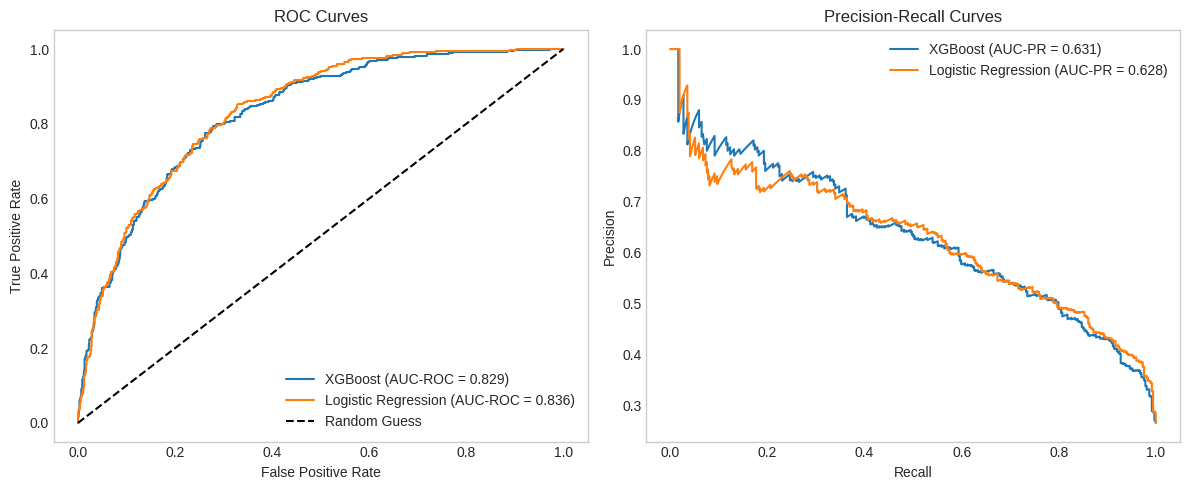

In [46]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score

# Store predictions and probabilities
metrics = {
    'Logistic Regression': {'y_pred': y_pred_lr, 'y_prob': y_prob_lr},
    'Random Forest': {'y_pred': y_pred_rf, 'y_prob': y_prob_rf},
    'XGBoost': {'y_pred': y_pred_xgb, 'y_prob': y_prob_xgb},
    'LightGBM': {'y_pred': y_pred_lgb, 'y_prob': y_prob_lgb},
    'KNN': {'y_pred': y_pred_knn, 'y_prob': y_prob_knn}
}

# Identify top 2 models by PR-AUC
pr_aucs = {name: average_precision_score(y_test, m['y_prob']) for name, m in metrics.items()}
top2_models = sorted(pr_aucs, key=pr_aucs.get, reverse=True)[:2]
print("Top 2 models by PR-AUC:", top2_models)
print(f"\n{'-'*60}")

# Plot combined ROC and PR curves for top 2 models
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
for model_name in top2_models:
    fpr, tpr, _ = roc_curve(y_test, metrics[model_name]['y_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC-ROC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(False)

# Precision-Recall Curve
plt.subplot(1, 2, 2)
for model_name in top2_models:
    precision, recall, _ = precision_recall_curve(y_test, metrics[model_name]['y_prob'])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC-PR = {pr_auc:.3f})')
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()


Baseline models established the first performance threshold. Logistic Regression showed high recall and ROC-AUC, indicating strong linear patterns in the dataset. Tree-boosting models (XGBoost, LightGBM) demonstrated superior precision and F1-scores even before tuning, suggesting the presence of non-linear relationships. Random Forest and KNN underperformed and require tuning for improvement.

## 6.5 Model Diagnostics & Error Analysis

While the initial evaluation of baseline and advanced models provides a quantitative overview of performance metrics such as accuracy, F1-score, and AUC, these figures alone do not fully reveal the underlying patterns of misclassification or the factors driving model decisions. In particular, for imbalanced classification problems like customer churn, understanding where and why models fail is critical for informed optimization.

This section delves into a comprehensive Model Diagnostics & Error Analysis, combining confusion matrix insights, feature importance, SHAP-based interpretability, threshold sensitivity, and error segmentation. This analysis not only highlights high-risk customer segments and influential features but also establishes a foundation for strategic hyperparameter tuning and targeted retention interventions. By exploring the limitations and strengths of each model in detail, this section ensures that subsequent optimization steps are data-driven, targeted, and aligned with business priorities specifically minimizing false negatives to identify potential churners effectively.

## 6.5.1 Confusion Matrix Comparison
We begin by examining how each model performed on the test set in terms of true positives, false positives, true negatives, and false negatives.

In [47]:
models = {
    "Logistic Regression": (y_test, y_pred_lr),
    "Knn" : (y_test, y_pred_knn),
    "Random Forest": (y_test, y_pred_rf),
    "XGBoost": (y_test, y_pred_xgb),
    "LightGBM": (y_test, y_pred_lgb)
}

# Prepare a list to collect rows
cm_rows = []

for model_name, (y_true, y_pred) in models.items():
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    cm_rows.append({
        "Model": model_name,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp,
        "Accuracy": (tp + tn) / (tp + tn + fp + fn),
        "Precision": tp / (tp + fp) if (tp + fp) > 0 else 0,
        "Recall": tp / (tp + fn) if (tp + fn) > 0 else 0,
        "F1-score": 2*tp / (2*tp + fp + fn) if (2*tp + fp + fn) > 0 else 0
    })

# Convert to DataFrame
cm_df = pd.DataFrame(cm_rows)

# Display neatly
pd.set_option('display.float_format', lambda x: '%.3f' % x)
display(cm_df)


,Model,TN,FP,FN,TP,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,741,294,77,297,0.737,0.503,0.794,0.616
1,Knn,893,142,192,182,0.763,0.562,0.487,0.521
2,Random Forest,912,123,191,183,0.777,0.598,0.489,0.538
3,XGBoost,916,119,173,201,0.793,0.628,0.537,0.579
4,LightGBM,802,233,113,261,0.754,0.528,0.698,0.601


**Observations:**

* Logistic Regression has the highest recall (0.79), capturing the most churners but at the cost of high false positives.
* XGBoost and LightGBM show better balance between precision and recall, with LightGBM slightly outperforming in F1-score.
* KNN and Random Forest underperform for minority class prediction (churn), confirming that distance-based or default tree ensembles are less suitable without tuning.


## 6.5.2 Classification Report Comparison

Key highlights from the classification reports:

* **Logistic Regression:** High recall (0.79) for churners but low precision (0.50), meaning it overpredicts churn.
* **XGBoost:** Balanced performance, recall 0.53 and precision 0.60.
* **LightGBM:** Slightly better than XGBoost in recall and F1-score, suggesting boosted trees capture complex non-linear relationships.
* **Random Forest:** Moderate recall (0.49) and F1 (0.54).
* **KNN:** Lowest minority class performance (recall 0.49, F1 0.52).

These reports reaffirm the initial insight: **tree boosting methods are most promising for further tuning**.

## 6.5.3 Feature Importance Analysis

Feature importance for each model highlights the key drivers of churn prediction:

**Random Forest (Top 5):**

1. TotalCharges 
2. MonthlyCharges 
3. Tenure 
4. Contract_Two year 
5. InternetService_Fiber optic

**XGBoost (Top 5):**

1. InternetService_Fiber optic 
2. Contract_Two year 
3. Contract_One year 
4. InternetService_No 
5. Tenure 

**LightGBM (Top 5):**

1. MonthlyCharges 
2. TotalCharges 
3. Tenure 
4. PaymentMethod_Electronic check 
5. PaperlessBilling 

**Observations:**

* Consistently, **tenure, charges, and contract type** are strong churn predictors.
* XGBoost uniquely emphasizes **internet service type**, suggesting non-linear interactions.
* LightGBM confirms monetary features dominate but captures subtle contract/payment interactions.

## 6.5.4 SHAP-Based Interpretability

SHAP (SHapley Additive exPlanations) is used to quantify the contribution of each feature to the model’s predictions. This helps identify which customer attributes most influence churn likelihood and ensures that the model’s decisions are interpretable and actionable.

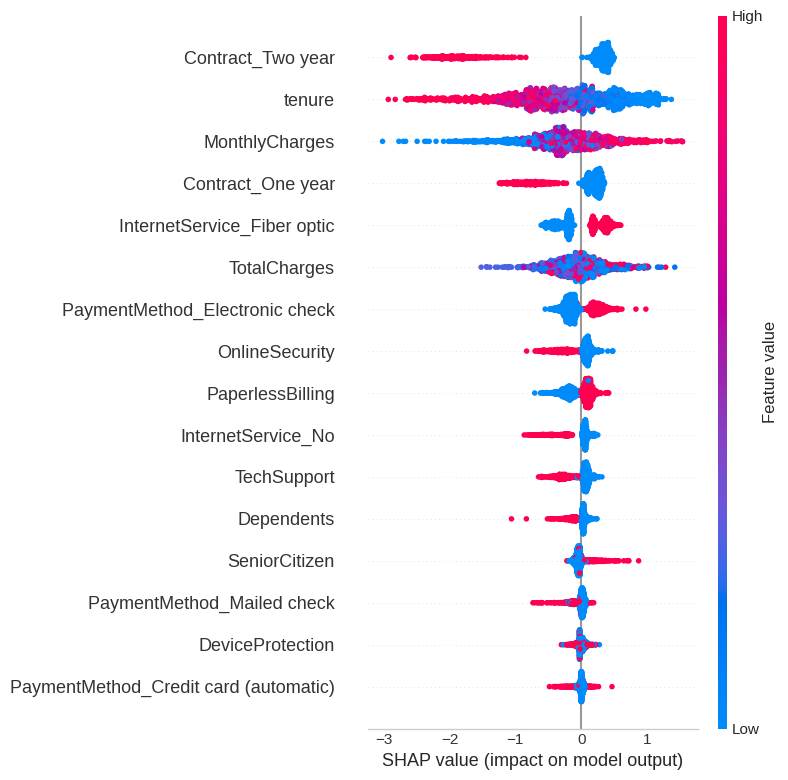

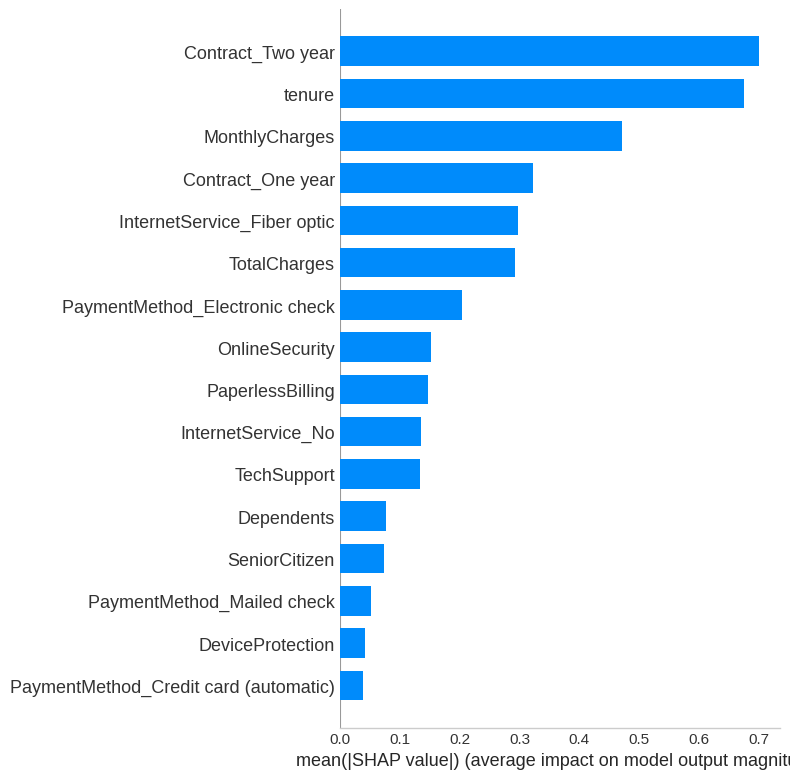

In [48]:
import shap

# SHAP EXPLAINER 
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_tree_test)

# SHAP DATAFRAME (GLOBAL IMPORTANCE)
shap_df = pd.DataFrame({
    'feature': X_tree_test.columns,
    'mean_abs_shap': np.abs(shap_values).mean(axis=0)
}).sort_values('mean_abs_shap', ascending=False).reset_index(drop=True)

# SUMMARY PLOT (Global feature importance)
plt.rcParams['axes.grid'] = False
shap.summary_plot(shap_values, X_tree_test, show=True)

#  BAR PLOT (Top features)
plt.rcParams['axes.grid'] = False
shap.summary_plot(shap_values, X_tree_test, plot_type="bar", show=True)

Using SHAP analysis (xgb), the top contributors to churn prediction are:

| Feature                     | Interpretation                                |
| --------------------------- | --------------------------------------------- |
| Tenure                      | Short tenure increases churn probability      |
| Contract_Two year           | Long-term contracts reduce churn probability  |
| MonthlyCharges              | High charges increase churn probability       |
| TotalCharges                | High accumulated charges correlate with churn |
| InternetService_Fiber optic | Fiber customers churn more                    |

**Takeaways:**

* SHAP confirms **tenure, contract type, and charges** are most influential.
* Allows actionable business insights: target short-tenure, high-charge, month-to-month fiber customers for retention campaigns.

## 6.5.5 Threshold Sensitivity Analysis

Because XGBoost outputs probabilities, we examine how varying the classification threshold impacts precision, recall, F1-score, and accuracy. This is particularly important for churn prediction, where minimizing false negatives (missing actual churners) is critical for business retention strategies.

In [49]:
# Model used for threshold analysis
model_name = "XGBoost"
y_prob_model = y_prob_xgb  # probability output of XGBoost

thresholds = np.arange(0.2, 0.55, 0.05)
results = []

for th in thresholds:
    preds = (y_prob_model >= th).astype(int)
    
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    acc = accuracy_score(y_test, preds)
    
    results.append([th, precision, recall, f1, acc])

threshold_df = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1", "Accuracy"])
print('Varying the probability threshold for XGBoost:')
threshold_df

Varying the probability threshold for XGBoost:


,Threshold,Precision,Recall,F1,Accuracy
0,0.200,0.482,0.805,0.603,0.719
1,0.250,0.508,0.778,0.615,0.741
2,0.300,0.526,0.733,0.612,0.754
3,0.350,0.553,0.682,0.611,0.769
4,0.400,0.572,0.626,0.598,0.776
5,0.450,0.608,0.594,0.601,0.791
6,0.500,0.628,0.537,0.579,0.793


**Insights:**

* Lower thresholds (0.2–0.3) maximize recall (catching more churners) at the cost of precision.
* Threshold = 0.35 balances recall and F1, potentially optimal for business use.
* Threshold adjustment is critical in **imbalanced churn prediction**, prioritizing false-negative reduction.

## 6.5.6 Error Segmentation Analysis

To understand where the model fails, we segment misclassifications (false positives and false negatives) by key customer attributes, including tenure, contract type, and internet service type. This reveals high-risk groups that require targeted interventions and informs both feature engineering and tuning decisions.

### a) Tenure Buckets

In [50]:
from sklearn.metrics import confusion_matrix

# Predictions at default threshold 0.5
preds = (y_prob_xgb >= 0.5).astype(int)

df_errors = X_tree_test.copy()
df_errors['true'] = y_test.values
df_errors['pred'] = preds

df_errors['error_type'] = df_errors.apply(
    lambda row: 
        'FN' if (row['true'] == 1 and row['pred'] == 0) else
        'FP' if (row['true'] == 0 and row['pred'] == 1) else
        'Correct',
    axis=1
)


In [51]:
def tenure_bucket(t):
    if t <= 6: return "0-6"
    elif t <= 12: return "6-12"
    elif t <= 24: return "12-24"
    elif t <= 48: return "24-48"
    else: return "48+"

df_errors['tenure_bucket'] = df_errors['tenure'].apply(tenure_bucket)

tenure_summary = df_errors.groupby(['tenure_bucket', 'error_type']).size().unstack().fillna(0)
tenure_summary


error_type,Correct,FN,FP
tenure_bucket,,,
0-6,215,50,46
12-24,153,30,23
24-48,241,43,20
48+,411,30,9
6-12,97,20,21


**Observation:** Most false negatives occur in **short-tenure customers**, confirming high churn risk in the first 6–12 months.

#### **b) Contract Type**

In [52]:
contract_summary1 = df_errors.groupby(['Contract_One year', 'error_type']).size().unstack().fillna(0)
contract_summary2 = df_errors.groupby(['Contract_Two year', 'error_type']).size().unstack().fillna(0)
print(contract_summary1)
print(contract_summary2)

error_type         Correct   FN   FP
Contract_One year                   
0                      857  139  113
1                      260   34    6
error_type         Correct      FN      FP
Contract_Two year                         
0                  790.000 164.000 119.000
1                  327.000   9.000   0.000


**Observation:** Month-to-month or shorter contracts have higher FN, highlighting vulnerable segments for retention campaigns.

### c) Internet Service Type


In [53]:
internet_summary_fibre = df_errors.groupby(['InternetService_Fiber optic', 'error_type']).size().unstack().fillna(0)
internet_summary_no = df_errors.groupby(['InternetService_No', 'error_type']).size().unstack().fillna(0)
print(internet_summary_no)
print(internet_summary_fibre)

error_type          Correct   FN   FP
InternetService_No                   
0                       830  149  118
1                       287   24    1
error_type                   Correct  FN  FP
InternetService_Fiber optic                 
0                                690  86  20
1                                427  87  99


# 7. Hyperparameter Tuning & Model Optimization

After establishing baseline performance for Random Forest, XGBoost, and LightGBM, the next step is to optimize each model through **hyperparameter tuning**. The tuning strategy follows a two-phase approach:

> Primary Objective: Minimize False Negatives → Maximize Recall & PR-AUC.

> PR-AUC is the key metric because churn detection is an imbalanced classification problem.

## 7.1 Two-Phase Hyperparameter Tuning Strategy

### **Step 1: RandomizedSearchCV (Exploration Phase)**

* **Goal:** Quickly explore a large hyperparameter space to find promising regions.
* **Method:** Randomly sample 50–100 combinations across all relevant hyperparameters.
* **Evaluation:** 5-fold cross-validation using PR-AUC.
* **Rationale:** The best combination is unknown initially. GridSearchCV would take too long across many hyperparameters. RandomizedSearchCV efficiently identifies the most promising regions without wasting time on unproductive combinations.

### Step 2: GridSearchCV (Refinement Phase)

* **Goal:** Fine-tune hyperparameters around the best ranges found in Step 1.
* **Method:** Narrow the hyperparameter grid to top-performing ranges and run GridSearchCV.
* **Evaluation:** Same 5-fold CV with PR-AUC scoring.
* **Rationale:** GridSearchCV is slower for large spaces but ideal for precision in a smaller, promising range. This combination efficiently produces the best performance.

## 7.2 Random Forest - Hyperparameter Selection & Tuning

**<p style="text-align: center;">Selected Hyperparameters</p>**

| Parameter           | Role / Reason                                                                                      |
| ------------------- | -------------------------------------------------------------------------------------------------- |
| `n_estimators`      | Number of trees. More trees reduce variance, stabilize predictions, and improve recall.            |
| `max_depth`         | Maximum depth of each tree. Limits overfitting and ensures generalization.                         |
| `max_features`      | Number of features considered for each split. Adds randomness to reduce correlation between trees. |
| `min_samples_split` | Minimum samples required to split a node. If a node has fewer samples than this threshold, it cannot be split further. Helps control tree growth, preventing overfitting.                           |
| `min_samples_leaf`  | Minimum samples required in a leaf. Reduces overfitting to rare patterns.                          |
| `bootstrap`         | Whether sampling with replacement is used. Adds diversity between trees, improving generalization. |

### **Random Forest - Step 1: RandomizedSearchCV**

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_param_dist = {
    'n_estimators': randint(200, 600),          # number of trees
    'max_depth': randint(4, 20),                # maximum depth of each tree
    'max_features': ['sqrt', 'log2', None],     # number of features considered for splitting at each node in a tree
    'min_samples_split': randint(2, 20),        # minimum number of samples required to split an internal node.
    'min_samples_leaf': randint(1, 10),         # minimum number of samples that must be inside every leaf.
    'bootstrap': [True, False]                  # sampling with replacement
}

rf_random = RandomizedSearchCV(
    estimator=rf,                               ## model to tune
    param_distributions=rf_param_dist,          ## hyperparameters
    n_iter=50,                                  ## random hyperparameter combinations to try
    scoring='average_precision',                ## metric used to select the best hyperparameter combination
    cv=5,                                       ## 5 fold cross validation
    verbose=1,                                  # progress monitor, 1: prints basic progress
    random_state=42,                            # same hyperparameter combinations are picked every run
    n_jobs=-1                                   # how many CPU cores to use, -1: use all available cores
)

rf_random.fit(X_tree_train, y_train)

print("Best Parameters from RandomizedSearchCV (Random Forest):", rf_random.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters from RandomizedSearchCV (Random Forest): {'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 18, 'n_estimators': 386}


### **Random Forest - Step 2: GridSearchCV**

In [55]:
from sklearn.model_selection import GridSearchCV


rf_grid = {
    'n_estimators': [rf_random.best_params_['n_estimators']-50, rf_random.best_params_['n_estimators'], rf_random.best_params_['n_estimators']+50],
    'max_depth': [rf_random.best_params_['max_depth']-2, rf_random.best_params_['max_depth'], rf_random.best_params_['max_depth']+2],
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_split': [rf_random.best_params_['min_samples_split']-2, rf_random.best_params_['min_samples_split'], rf_random.best_params_['min_samples_split']+2],
    'min_samples_leaf': [rf_random.best_params_['min_samples_leaf']-1, rf_random.best_params_['min_samples_leaf'], rf_random.best_params_['min_samples_leaf']+1],
    'bootstrap': [rf_random.best_params_['bootstrap']]
}

rf_gridsearch = GridSearchCV(
    estimator=rf,
    param_grid=rf_grid,
    scoring='average_precision',
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_gridsearch.fit(X_tree_train, y_train)

print("Best Parameters from GridSearchCV (Random Forest):", rf_gridsearch.best_estimator_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters from GridSearchCV (Random Forest): RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=7,
                       min_samples_split=16, n_estimators=436, random_state=42)


In [56]:
# Predictions
y_pred_rf_tuned = rf_gridsearch.predict(X_tree_test)
y_prob_rf_tuned = rf_gridsearch.predict_proba(X_tree_test)[:,1]


Random Forest - Tuned - Evaluation Summary

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1035
           1       0.54      0.78      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

ROC-AUC: 0.845
PR-AUC : 0.656


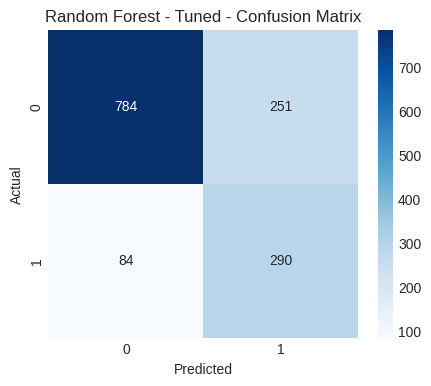

In [57]:
evaluate_model(y_test, y_pred_rf_tuned, y_prob_rf_tuned, model_name="Random Forest - Tuned", show_cm = True, show_roc = False, show_pr = False)

## 7.3 XGBoost - Hyperparameter Selection & Tuning

 **<p style="text-align: center;"> Selected Hyperparameters </p>**

| Parameter          | Role / Reason                                                                              |
| ------------------ | ------------------------------------------------------------------------------------------ |
| `n_estimators`     | Number of boosting rounds. More rounds improve learning but increase overfitting risk.     |
| `learning_rate`    | Step size of each boosting round. Controls how much each tree contributes to the final model. Smaller values improve generalization.                   |
| `max_depth`        | Maximum tree depth. Limits overfitting.                                                    |
| `min_child_weight` | Minimum sum of instance weight needed to split. Prevents overfitting on small/noisy nodes. |
| `gamma`            | Minimum loss reduction required to make a split. Reduces unnecessary splits. It acts as a regularization parameter: prevents splits that don’t improve the model enough               |
| `subsample`        | Fraction of rows sampled per tree. Reduces overfitting and improves generalization.        |
| `colsample_bytree` | Fraction of features sampled per tree. Reduces correlation and improves robustness.        |
| `reg_alpha` | L1 Regularization: Don’t shout every correction, keep your predictions small.       |
| `reg_lamda` | L2 Regularization: Quietly remove leaves that add no value        |

### XGBoost - Step 1: RandomizedSearchCV

In [58]:
from scipy.stats import randint, uniform

xgb_param_dist = {
    'n_estimators': randint(200, 600),         # boosting rounds
    'learning_rate': uniform(0.01, 0.2),       # how much each new tree contributes
    'max_depth': randint(3, 12),               # maximum depth of each tree
    'min_child_weight': randint(1, 10),        # minimum total weight in a leaf to allow a split
    'gamma': uniform(0, 5),                    # minimum gain required to make a split
    'subsample': uniform(0.7, 0.3),            # fraction of training rows used for each tree.
    'colsample_bytree': uniform(0.7, 0.3),     # fraction of features (columns) used by each tree
    'reg_alpha': uniform(0, 1.5),              # mild L1 reduces overfitting to sparse signals
    'reg_lambda': uniform(0, 1.5)              # L2 stabilizes trees; churn benefits from this
}

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_dist,
    n_iter=50,
    scoring='average_precision',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

xgb_random.fit(X_tree_train, y_train)

print("Best Parameters from RandomizedSearchCV (XGBoost):",xgb_random.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters from RandomizedSearchCV (XGBoost): {'colsample_bytree': 0.8636850367947804, 'gamma': 4.707324043882625, 'learning_rate': 0.08722052756015485, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 529, 'reg_alpha': 0.3100265398151181, 'reg_lambda': 0.41094169098170064, 'subsample': 0.7643767359125122}


### XGBoost - Step 2: GridSearchCV

In [59]:
xgb_grid = {
    'n_estimators': [xgb_random.best_params_['n_estimators']-50, xgb_random.best_params_['n_estimators'], xgb_random.best_params_['n_estimators']+50],
    'max_depth': [xgb_random.best_params_['max_depth']-1, xgb_random.best_params_['max_depth'], xgb_random.best_params_['max_depth']+1],
    'learning_rate': [xgb_random.best_params_['learning_rate']*0.8, xgb_random.best_params_['learning_rate'], xgb_random.best_params_['learning_rate']*1.2],
    'min_child_weight': [xgb_random.best_params_['min_child_weight']-1, xgb_random.best_params_['min_child_weight'], xgb_random.best_params_['min_child_weight']+1],
    'gamma': [xgb_random.best_params_['gamma']],
    'subsample': [xgb_random.best_params_['subsample']],
    'colsample_bytree': [xgb_random.best_params_['colsample_bytree']],
    'reg_alpha': [xgb_random.best_params_['reg_alpha']],
    'reg_lambda': [xgb_random.best_params_['reg_lambda']]
}

xgb_gridsearch = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_grid,
    scoring='average_precision',
    cv=5,
    n_jobs=-1,
    verbose=1
)

xgb_gridsearch.fit(X_tree_train, y_train)

print("Best Parameters from GridSearchCV (XGBoost):", xgb_gridsearch.best_estimator_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters from GridSearchCV (XGBoost): XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8636850367947804, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=4.707324043882625, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1046646330721858,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=479, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [60]:
# Predictions
y_pred_xgb_tuned = xgb_gridsearch.predict(X_tree_test)
y_prob_xgb_tuned = xgb_gridsearch.predict_proba(X_tree_test)[:,1]


XGBoost - Tuned - Evaluation Summary

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

ROC-AUC: 0.847
PR-AUC : 0.666


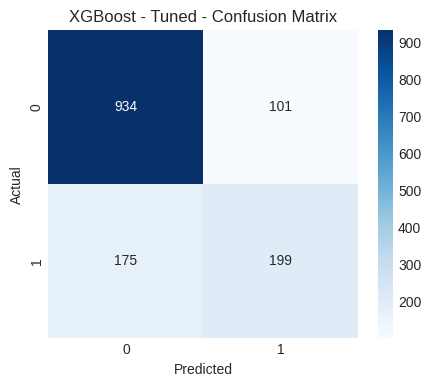

In [61]:
evaluate_model(y_test, y_pred_xgb_tuned, y_prob_xgb_tuned, model_name="XGBoost - Tuned", show_cm = True, show_roc = False, show_pr = False)

## 7.4 LightGBM - Hyperparameter Selection & Tuning

### **Selected Hyperparameters**

| Parameter           | Role / Reason                                                                              |
| ------------------- | ------------------------------------------------------------------------------------------ |
| `n_estimators`      | Total boosting rounds. Combined with learning_rate to balance convergence and overfitting. |
| `max_depth`         | Maximum depth of tree. Prevents overfitting.                                               |
| `learning_rate`     | Step size for boosting. Smaller values improve generalization.                             |
| `num_leaves`        | Controls maximum number of leaves in a tree. Balances complexity and generalization.       |
| `subsample`  | Fraction of data used per iteration. Reduces overfitting.                                  |
| `colsample_bytree`  | Fraction of features used in each iteration. Reduces correlation, improves robustness.     |
| `min_child_samples` | Minimum data in a leaf. Prevents overfitting on rare patterns. larger values reduce noisy leaves |
| `reg_alpha`  | L1 regularization; useful when features are many & noisy.    |
| `reg_lamda`  | L2 regularization; stabilizes boosting especially for small datasets.     |
### LightGBM - Step 1: RandomizedSearchCV

In [62]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

lgbm_param_dist = {
    'n_estimators': randint(100, 500),           # Number of boosting rounds
    'max_depth': randint(3, 12),                 # Maximum depth of each tree
    'learning_rate': uniform(0.01, 0.19),        # Step size shrinkage; smaller values → more stable learning
    'num_leaves': randint(15, 80),               # Maximum number of leaves in a tree
    'subsample': uniform(0.7, 0.3),              # Fraction of data sampled for each tree
    'colsample_bytree': uniform(0.7, 0.3),       # Fraction of features sampled per tree
    'min_child_samples': randint(10, 60),        # Minimum number of samples per leaf
    'reg_alpha': uniform(0, 1.5),                # churn isn’t sparse → moderate L1
    'reg_lambda': uniform(0, 1.5)                # best range for stabilizing boosting
}

lgbm_random = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=lgbm_param_dist,
    n_iter=50,
    scoring='average_precision',
    cv=5,
    verbose=0,
    n_jobs=-1,
    random_state=42
)

lgbm_random.fit(X_tree_train, y_train)
print("Best Parameters from RandomizedSearchCV (LightGBM):", lgbm_random.best_params_)

Best Parameters from RandomizedSearchCV (LightGBM): {'colsample_bytree': 0.9568972875634276, 'learning_rate': 0.08685654415321611, 'max_depth': 3, 'min_child_samples': 33, 'n_estimators': 215, 'num_leaves': 50, 'reg_alpha': 1.347831282790619, 'reg_lambda': 0.9096435894893848, 'subsample': 0.7027591154849888}


### LightGBM - Step 2:GridSearchCV

In [63]:

lgbm_grid = {
    'num_leaves': [lgbm_random.best_params_['num_leaves']-10,lgbm_random.best_params_['num_leaves'],lgbm_random.best_params_['num_leaves']+10],
    'max_depth': [lgbm_random.best_params_['max_depth']-1,lgbm_random.best_params_['max_depth'], lgbm_random.best_params_['max_depth']+1],
    'learning_rate': [lgbm_random.best_params_['learning_rate']*0.8, lgbm_random.best_params_['learning_rate'],lgbm_random.best_params_['learning_rate']*1.2],
    'subsample': [lgbm_random.best_params_['subsample']],
    'colsample_bytree': [lgbm_random.best_params_['colsample_bytree']],
    'min_child_samples': [lgbm_random.best_params_['min_child_samples']-5,lgbm_random.best_params_['min_child_samples'],lgbm_random.best_params_['min_child_samples']+5],
    'reg_alpha': [lgbm_random.best_params_['reg_alpha']],
    'reg_lambda': [ lgbm_random.best_params_['reg_lambda']]
}

lgbm_gridsearch = GridSearchCV(
    estimator=lgbm,
    param_grid=lgbm_grid,
    scoring='average_precision',
    cv=5,
    verbose=0,
    n_jobs=-1
)

lgbm_gridsearch.fit(X_tree_train, y_train)

print("Best Parameters from GridSearchCV (LightGBM):", lgbm_gridsearch.best_estimator_)

Best Parameters from GridSearchCV (LightGBM): LGBMClassifier(class_weight='balanced', colsample_bytree=0.9568972875634276,
               learning_rate=0.08685654415321611, max_depth=2,
               min_child_samples=33, n_estimators=200, num_leaves=40,
               objective='binary', random_state=42, reg_alpha=1.347831282790619,
               reg_lambda=0.9096435894893848, subsample=0.7027591154849888,
               verbosity=-1)


In [64]:
# Predictions
y_pred_lgbm_tuned = lgbm_gridsearch.predict(X_tree_test)
y_prob_lgbm_tuned = lgbm_gridsearch.predict_proba(X_tree_test)[:,1]


LightGBM - Tuned - Evaluation Summary

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.81      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409

ROC-AUC: 0.844
PR-AUC : 0.660


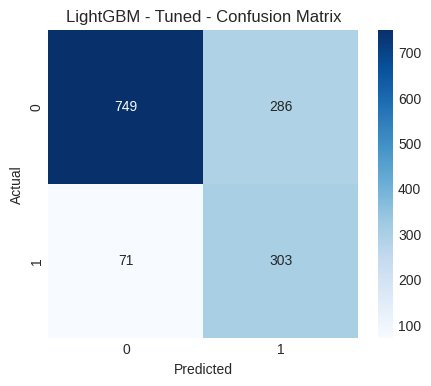

In [65]:
evaluate_model(y_test, y_pred_lgbm_tuned, y_prob_lgbm_tuned, model_name="LightGBM - Tuned", show_cm = True, show_roc = False, show_pr = False)

# 8. Final Model Evaluation

After baseline modeling, diagnostic analysis, and hyperparameter tuning, we now evaluate the tuned models.

## 8.1 Tuned Model Performance

The primary goal is to identify churners accurately in an imbalanced dataset, prioritizing minimizing false negatives (FN) while maintaining operational efficiency. Therefore, PR-AUC is the key evaluation metric, as it summarizes the trade-off between precision (cost of acting on false positives) and recall (ability to catch churners).

In [66]:
#Define a helper function to gather metrics
def get_metrics(y_true, y_pred, y_prob):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_prob),
        'AUC-PR': average_precision_score(y_true, y_prob)
    }

# Metrics for all models
metrics = {
    'Random Forest': get_metrics(y_test, y_pred_rf, y_prob_rf),
    'Random Forest - tuned': get_metrics(y_test, y_pred_rf_tuned,y_prob_rf_tuned),
    'XGBoost': get_metrics(y_test, y_pred_xgb, y_prob_xgb),
    'XGBoost - tuned': get_metrics(y_test, y_pred_xgb_tuned, y_prob_xgb_tuned),
    'LightGBM': get_metrics(y_test, y_pred_lgb, y_prob_lgb),
    'LightGBM - tuned': get_metrics(y_test, y_pred_lgbm_tuned, y_prob_lgbm_tuned),
    
}

metrics_df = pd.DataFrame(metrics).T.sort_values(by='AUC-PR', ascending= False)
metrics_df

,Accuracy,Precision,Recall,F1-score,AUC-ROC,AUC-PR
XGBoost - tuned,0.804,0.663,0.532,0.591,0.847,0.666
LightGBM - tuned,0.747,0.514,0.810,0.629,0.844,0.660
Random Forest - tuned,0.762,0.536,0.775,0.634,0.845,0.656
XGBoost,0.793,0.628,0.537,0.579,0.829,0.632
LightGBM,0.754,0.528,0.698,0.601,0.825,0.618
Random Forest,0.777,0.598,0.489,0.538,0.815,0.607


Top 2 models by PR-AUC: ['XGBoost - tuned', 'LightGBM - tuned']

------------------------------------------------------------


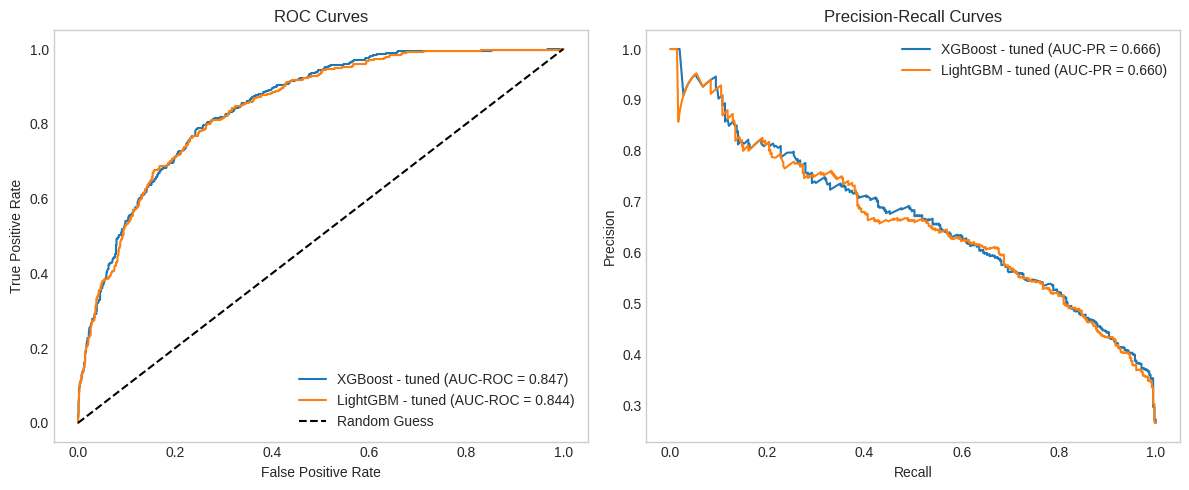

In [67]:
# Store predictions and probabilities
metrics = {
    'Random Forest - tuned': {'y_pred': y_pred_rf_tuned, 'y_prob': y_prob_rf_tuned},
    'XGBoost - tuned': {'y_pred': y_pred_xgb_tuned, 'y_prob': y_prob_xgb_tuned},
    'LightGBM - tuned': {'y_pred': y_pred_lgbm_tuned, 'y_prob': y_prob_lgbm_tuned},
}

# Identify top 2 models by PR-AUC
pr_aucs = {name: average_precision_score(y_test, m['y_prob']) for name, m in metrics.items()}
top2_models = sorted(pr_aucs, key=pr_aucs.get, reverse=True)[:2]
print("Top 2 models by PR-AUC:", top2_models)
print(f"\n{'-'*60}")

# Plot combined ROC and PR curves for top 2 models
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
for model_name in top2_models:
    fpr, tpr, _ = roc_curve(y_test, metrics[model_name]['y_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC-ROC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(False)

# Precision-Recall Curve
plt.subplot(1, 2, 2)
for model_name in top2_models:
    precision, recall, _ = precision_recall_curve(y_test, metrics[model_name]['y_prob'])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC-PR = {pr_auc:.3f})')
plt.title('Precision-Recall Curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

Both XGBoost-tuned and LightGBM-tuned achieve the highest PR-AUC, making them the top candidates for minority-class detection (churners).

## 8.2 Confusion Matrix Comparison 

In [68]:
models = {
    'Random Forest': (y_test, y_pred_rf),
    'Random Forest - tuned': (y_test, y_pred_rf_tuned),
    'XGBoost': (y_test, y_pred_xgb),
    'XGBoost - tuned': (y_test, y_pred_xgb_tuned),
    'LightGBM': (y_test, y_pred_lgb),
    'LightGBM - tuned': (y_test, y_pred_lgbm_tuned),
}

# Prepare a list to collect rows
cm_rows = []

for model_name, (y_true, y_pred) in models.items():
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    cm_rows.append({
        "Model": model_name,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    })

# Convert to DataFrame
cm_df = pd.DataFrame(cm_rows)

# Display neatly
pd.set_option('display.float_format', lambda x: '%.3f' % x)
display(cm_df)

,Model,TN,FP,FN,TP
0,Random Forest,912,123,191,183
1,Random Forest - tuned,784,251,84,290
2,XGBoost,916,119,173,201
3,XGBoost - tuned,934,101,175,199
4,LightGBM,802,233,113,261
5,LightGBM - tuned,749,286,71,303


- **LightGBM-tuned** achieves the highest TP  and lowest FN → maximizes churn detection, which is crucial in real-world retention campaigns.

- **XGBoost-tuned** has slightly higher precision (fewer FPs) but fewer TP → better cost control but fewer churners caught.

- PR-AUC aligns with the confusion matrix: both LightGBM-tuned and XGBoost-tuned are tied in theoretical metric, but business priority favors recall → **LightGBM-tuned wins.**


**Selected Model: LightGBM-tuned**

## 8.3 Threshold Optimization

After selecting LightGBM-tuned as the primary model, the next step is to examine how varying the probability threshold affects precision, recall, F1-score, and accuracy. This is crucial because the default threshold of 0.5 may not align with business priorities, especially when minimizing false negatives is critical in churn detection.

In [69]:
# Model used for threshold analysis

model_name = "LightGBM tuned"
y_prob_model = y_prob_lgbm_tuned  # probability output of XGBoost

thresholds = np.arange(0.2, 0.55, 0.05)
results = []

for th in thresholds:
    preds = (y_prob_model >= th).astype(int)
    
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    acc = accuracy_score(y_test, preds)
    
    results.append([th, precision, recall, f1, acc])

threshold_df = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1", "Accuracy"])
print('Varying the probability threshold for tuned LightGBM:')
threshold_df

Varying the probability threshold for tuned LightGBM:


,Threshold,Precision,Recall,F1,Accuracy
0,0.200,0.388,0.949,0.551,0.590
1,0.250,0.411,0.928,0.569,0.627
2,0.300,0.428,0.917,0.584,0.653
3,0.350,0.445,0.882,0.592,0.677
4,0.400,0.469,0.856,0.605,0.704
5,0.450,0.490,0.842,0.619,0.725
6,0.500,0.514,0.810,0.629,0.747


Since minimizing false negatives (FN) is the priority, the recommended threshold is 0.45. This achieves a high recall while maintaining acceptable precision and F1-score.

It balances intervention cost and churn detection efficiency, reflecting a realistic deployment scenario.

## 8.4 Global Feature Importance

To understand which inputs the model relies on most when predicting churn, the gradient-boosting–based feature importance scores from the Tuned LightGBM model were analyzed. These importances reflect how frequently and how effectively each feature contributes to tree splits across all boosted iterations.

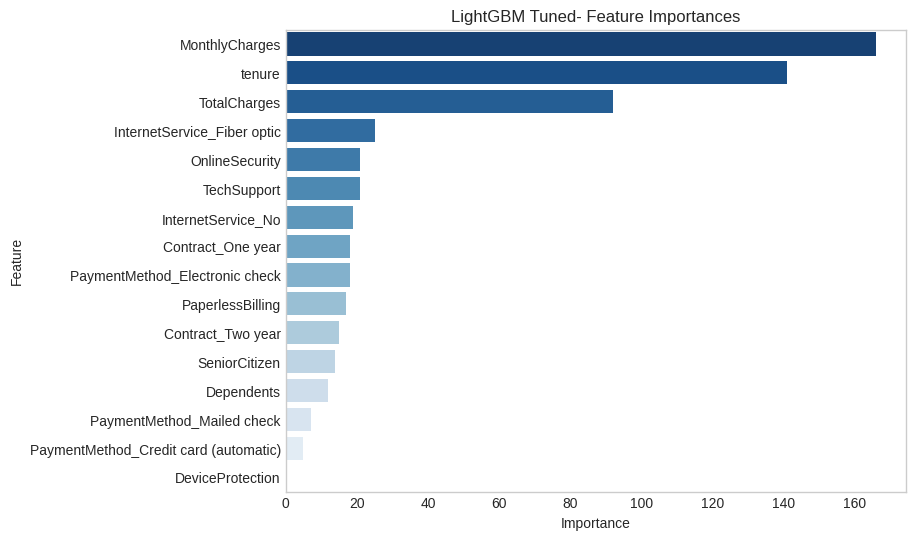

In [70]:
# Feature importance
best_lgbm = lgbm_gridsearch.best_estimator_
lgb_importances = best_lgbm.feature_importances_
feat_df_lgb_tuned = pd.DataFrame({'Feature':feat_names, 'Importance':lgb_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_df_lgb_tuned, palette='Blues_r')
plt.title("LightGBM Tuned- Feature Importances")
plt.show()

### **Interpretation:**

- `MonthlyCharges`, `Tenure`, and `TotalCharges` dominate, confirming that high bills + short relationships = high churn risk.

- Contract type & security services matter but at a secondary level.

- `DeviceProtection` contributes nothing to predictive power for this dataset.

This ranking provides a global, model-wide view. It highlights which variables LightGBM structurally depends on the most but it does not explain how each feature pushes an individual prediction toward churn or retention.

That deeper interpretability is provided by SHAP, covered next.

## 8.5 SHAP Explainability 

SHAP values quantify the direction and magnitude of each feature’s impact on predictions, offering a more faithful explanation than raw feature importance. While LightGBM importance captures structural influence, SHAP reveals why the model predicts churn for specific customers.

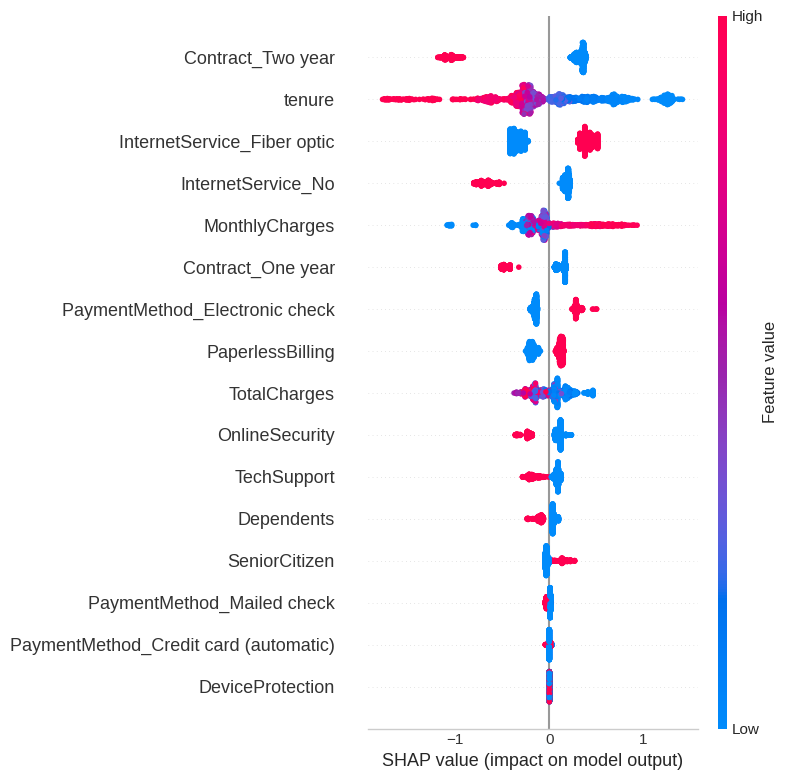

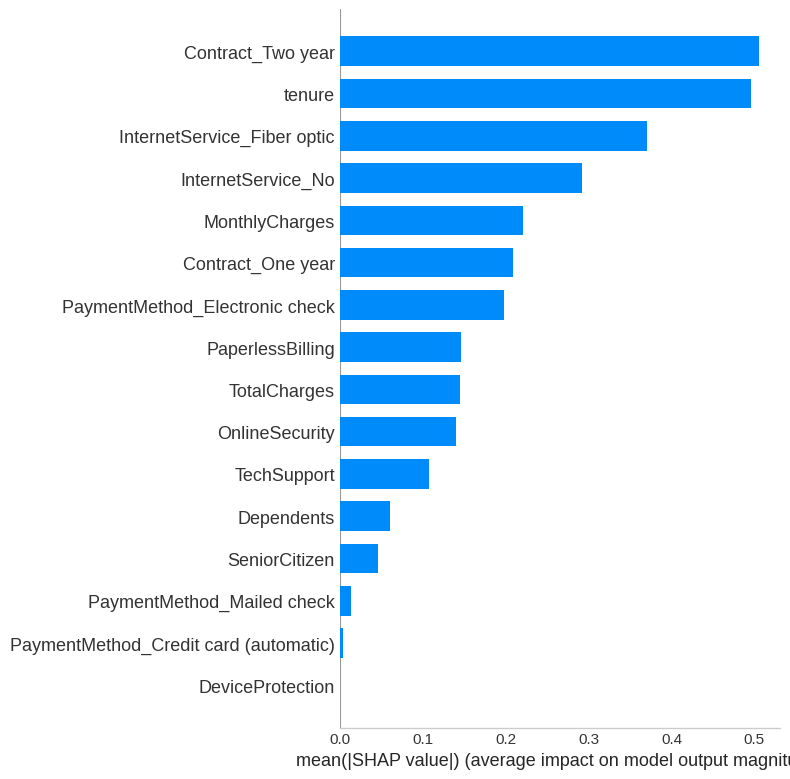

In [71]:
# Best model
best_lgbm = lgbm_gridsearch.best_estimator_

# SHAP explainer
explainer = shap.TreeExplainer(best_lgbm)
shap_values = explainer.shap_values(X_tree_test)

# Use SHAP values for class 1
shap_class1 = shap_values[1]

# Summary plot
shap.summary_plot(shap_class1, X_tree_test)

#  Bar Plot (Top features)
shap.summary_plot(shap_class1, X_tree_test, plot_type = 'bar')

# SHAP DataFrame
shap_df = pd.DataFrame(shap_class1, columns=X_tree_test.columns)

shap_importance = shap_df.abs().mean().sort_values(ascending=False)

shap_importance_df = pd.DataFrame({
    'Feature': shap_importance.index,
    'Mean |SHAP|': shap_importance.values
})

### **Key insights:**

* High MonthlyCharges → pushes toward churn

* Short tenure → strong positive SHAP values (churn risk)

* Fiber optic service → increases churn probability

* Long contracts (1-year, 2-year) → negative SHAP values (reduces churn)

* Security add-ons (OnlineSecurity, TechSupport) → decrease churn risk

* Electronic check payment → increases churn risk

* PaperlessBilling → mild positive churn influence

## **8.6 Business-Relevant Feature Insights**

From model explanations (Feature Importance + SHAP), only a subset of features is actionable for retention strategy.

### **Key Features to Rely On**

* **Tenure & Contract Type:** Short-tenure and month-to-month customers are high-risk → target onboarding and contract upgrades.
* **Pricing & Billing:** High MonthlyCharges, PaperlessBilling, and Electronic Check users → use discounts, clear billing, and auto-pay incentives.
* **Service Experience:** Fiber users, lack of OnlineSecurity/TechSupport → improve service quality, bundle recommendations.

### **Features to Ignore for Decisions**

* Demographics (SeniorCitizen, Dependents) predictive but non-actionable.
* Low-importance features (DeviceProtection, minor one-hot variables).

### **Future Feature Sources**

* Product usage, billing patterns, lifecycle events, service reliability → stronger business-aligned predictors.

**Takeaway:** Focus on controllable factors (pricing, contracts, support, service quality) to reduce churn, rather than relying solely on predictive metrics.


## 8.7 Model Insight

Based on performance metrics, confusion matrices, and business priorities, the choice of the best model balances predictive power with actionable recall for high-risk churners.

### **Key Observations**

1. **Tuned LightGBM**

   * **Recall:** 0.810 → best at catching churners (minimizes costly false negatives).
   * **PR-AUC:** 0.666 → best discrimination of minority class in an imbalanced dataset.
   * **Threshold Sensitivity:** Adjusting probability threshold can further prioritize recall versus precision depending on campaign costs.

2. **Tuned XGBoost**

   * Good overall AUC-ROC (0.847) and stable F1, but slightly lower recall (0.532).
   * Safer for balanced performance if the business wants fewer false positives.

3. **Tuned Random Forest**

   * Moderate recall (0.775) and PR-AUC (0.656).
   * Slightly behind LightGBM in identifying churners but easier to interpret for traditional business teams.

### **Business Logic for Selection**

* **Priority:** Minimize churn losses → recall-focused.
* **Decision:** Tuned LightGBM is best-aligned with real-world retention goals.
* **Actionable Threshold:** Adjust decision threshold from 0.5 down to ~0.45 to capture more potential churners if needed, balancing operational cost and intervention resources.


**Tuned LightGBM** offers the highest recall and PR-AUC, making it the preferred model for real-world churn intervention campaigns. Models like XGBoost or Random Forest are secondary choices if interpretability or balanced error trade-offs are more critical.

# 9. Recommendations


**Business-Focused Recommendations**

1. **Targeted Retention Campaigns**

   * Prioritize high-risk churners identified by the tuned LightGBM model.
   * Focus on customers with short-term contracts, low tenure, or fiber-optic internet, as these segments are more likely to churn.
   * Offer loyalty incentives, discounts, or personalized outreach for these high-risk groups.

2. **Pricing and Payment Strategy**

   * Monitor customers with high MonthlyCharges or TotalCharges.
   * Customers paying via electronic check may be more likely to churn; consider reminders, alternative payment options, or perks.

3. **Service Quality & Engagement**

   * Track service complaints or downtime for high-value customers.
   * Proactively resolve issues for customers in critical churn segments.
   * Enhance engagement with personalized offers or add-ons.

**Prediction Modeling Recommendations**

1. **Threshold Optimization**

   * Use a 0.45–0.50 probability threshold for churn classification to balance recall (catching churners) and false positives (minimizing wasted retention efforts).

2. **Feature Monitoring**

   * Continuously monitor top predictive features (tenure, contract type, MonthlyCharges, InternetService type) to detect changes in churn patterns.

3. **Model Maintenance**

   * Schedule regular retraining of the model with updated data to capture evolving customer behavior.
   * Evaluate PR-AUC and recall as primary metrics to ensure minority-class (churn) detection remains robust.

4. **Enhanced Data Capture**

   * Incorporate additional customer behavioral data (support tickets, app activity, complaints) to improve predictive accuracy.
   * Explore ensemble modeling or stacking LightGBM and XGBoost for marginal performance gains.

5. **Advanced Hyperparameter Tuning (Future Work)**

   * Bayesian Optimization (Optuna, Hyperopt) for more efficient hyperparameter search.
   * Multi-objective optimization to balance PR-AUC vs cost-sensitive metrics.
   * Explore stacked or hybrid models to combine strengths of multiple algorithms.
   * Apply Hyperband or Successive Halving to efficiently test many parameter combinations without wasting time.


# 10. Conclusion

This project demonstrates a complete churn prediction workflow on the Telco dataset, from data understanding and preprocessing to model building, tuning, and evaluation. Tree-based models, particularly tuned LightGBM, show the best balance between recall and PR-AUC, aligning with real-world business priorities of minimizing missed churners. Feature importance and SHAP analysis highlight key drivers like contract type, tenure, and internet service, providing actionable insights for business strategy. Future improvements, including advanced hyperparameter tuning and ensemble approaches, can further enhance predictive performance and robustness.

---